From The stata Data lets first extract only Mysuru Data (2730 samples)

In [1]:
import pandas as pd

# Load the Stata data
data = pd.read_stata('Stata Data/6-7_without_Kolkata.dta')

# Calculate column-wise missing value percentages
missing_percentages = data.isna().mean() * 100

# Create a DataFrame for missing values
missing_df = pd.DataFrame({
    'Column_Name': missing_percentages.index,
    'Missing_Percentage': missing_percentages.values
})

# Save the overall missing percentages to a text file
missing_df.to_csv('full_data_missing_percentage.txt', sep='\t', index=False)

# Filter rows where 'centre' is 'Mysuru'
mysuru_data = data[data['centre'] == 'Mysuru']

# Save the filtered data to a new Stata file
mysuru_data.to_stata('6-7_Mysuru.dta', write_index=False)

# Calculate missing percentages for the Mysuru subset
mysuru_missing = mysuru_data.isna().mean() * 100

# Create a DataFrame for Mysuru missing values
mysuru_missing_df = pd.DataFrame({
    'Column_Name': mysuru_missing.index,
    'Missing_Percentage': mysuru_missing.values
})

# Save the Mysuru missing percentages to a text file
mysuru_missing_df.to_csv('mysuru_data_missing_percentage.txt', sep='\t', index=False)

/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_68313/1300706166.py:4: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata('Stata Data/6-7_without_Kolkata.dta')
/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_68313/1300706166.py:22: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column wgtunit contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  mysuru_data.to_stata('6-7_Mysuru.dta', write_index=False)
/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_68313/1300706166.py:22: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Co

In [2]:
import pandas as pd

# Load the Stata data
data = pd.read_stata('6-7_Mysuru.dta')

# List of interested columns
columns_of_interest = [
    'medpill', 'medpil1a', 'medpil1b', 'medpil2a', 'medpil2b',
    'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b'
]

# Ensure the columns exist in the dataset
existing_columns = [col for col in columns_of_interest if col in data.columns]

# Print unique values and their counts for each column
for col in existing_columns:
    print(f"\nColumn: {col}")
    print("Unique Values and Counts:")
    value_counts = data[col].value_counts(dropna=False)
    for value, count in value_counts.items():
        print(f"  {value}: {count}")


Column: medpill
Unique Values and Counts:
  nan: 2681
  Yes: 25
  No: 24

Column: medpil1a
Unique Values and Counts:
  : 2708
  Asthalin: 14
  Asthaline: 2
  ASTHALIN: 1
  asthaline: 1
  Deriphiline: 1
  Deriphyline: 1
  Theoasthalin: 1
  Derifilin: 1

Column: medpil1b
Unique Values and Counts:
  nan: 2708
  Only when needed: 17
  In short courses: 5

Column: medpil2a
Unique Values and Counts:
  : 2727
  Montek: 2
  MONTEK: 1

Column: medpil2b
Unique Values and Counts:
  nan: 2727
  Only when needed: 2
  In short courses: 1

Column: medpil3a
Unique Values and Counts:
  : 2728
  Dephcarte: 1
  Omnacortil: 1

Column: medpil3b
Unique Values and Counts:
  nan: 2727
  Only when needed: 3

Column: medpil4a
Unique Values and Counts:
  : 2727
  Azee: 1
  Azithral: 1
  Augmentin: 1

Column: medpil4b
Unique Values and Counts:
  nan: 2726
  Only when needed: 4


Kernel restart + 6-7_Mysuru data

In [1]:
import pandas as pd

# Replace "file_path.dta" with the path to your Stata file
data_6_7 = pd.read_stata("6-7_Mysuru.dta")

# Now 'data' is a DataFrame containing your Stata data
data_6_7.head()

,form,version,country,centre,school,serial,seriala1,seriala2,dint,dint_stata,...,guava_india,curdyog_india,colddrinks_india,icecreams_india,cakepastries_india,packcrunchy_india,pincode_poll,annualpm25_poll,latitude_poll,longitude_poll
0,2,1,404,Mysuru,98,1001.0,100111.0,100112.0,16082017,21047.0,...,No,No,No,No,No,No,NaN,,NaN,NaN
1,2,1,404,Mysuru,98,1002.0,100211.0,100212.0,16082017,21047.0,...,No,No,No,No,No,No,NaN,,NaN,NaN
2,2,1,404,Mysuru,98,1003.0,100311.0,100312.0,29082017,21060.0,...,No,No,No,No,No,No,NaN,,NaN,NaN
3,2,1,404,Mysuru,98,1004.0,100411.0,100412.0,18082017,21049.0,...,No,Yes,Yes,Yes,No,No,NaN,,NaN,NaN
4,2,1,404,Mysuru,98,1005.0,100511.0,100512.0,14082017,21045.0,...,No,No,No,No,No,No,NaN,,NaN,NaN


In [2]:
data = data_6_7.copy()
data.info()
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 181 entries, form to longitude_poll
dtypes: category(139), float32(1), float64(24), int16(1), int32(2), int8(3), object(11)
memory usage: 1.2+ MB
form                     int8
version                  int8
country                 int16
centre               category
school                   int8
                       ...   
packcrunchy_india    category
pincode_poll          float64
annualpm25_poll        object
latitude_poll         float64
longitude_poll        float64
Length: 181, dtype: object


In [3]:
# Get all column names where the size is 181
columns_181 = [col for col in data.columns]

print(columns_181)

['form', 'version', 'country', 'centre', 'school', 'serial', 'seriala1', 'seriala2', 'dint', 'dint_stata', 'age', 'agecalc', 'dbirth', 'dbirth_stata', 'sex', 'weight', 'wgtunit', 'weight_kg', 'height', 'hgtunit', 'height_m', 'language', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'asthplan', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'school12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'rash12', 'sitesev', 'rashage', 'rclear12', 'rawake12', 'eczemaev', 'eczedoc', 'mparaprg', 'animoth', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'bweight', 'bweight_kg', 'bwgtunit', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'milkyngb', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', '

In [4]:
# value counts in one of the above category type column namely "centre"
centre_value_counts = data['centre'].value_counts()
print("Value counts:")
print(centre_value_counts)
print("\n \n \n")


# value counts in one of the above category type column namely "burger"
burger_value_counts = data['burger'].value_counts()
print("Value counts:")
print(burger_value_counts)
print("\n \n \n")


# Assuming 'form' is the column of interest in your DataFrame 'data'
form_value_counts = data['version'].value_counts()
print("Counts of unique values in the 'version' column:")
print(form_value_counts)
print("\n \n \n")

# Assuming 'country' is the column of interest in your DataFrame 'data'
country_value_counts = data['country'].value_counts()
print("Counts of unique values in the 'country' column:")
print(country_value_counts)
print("\n \n \n")

# Get all column names where the size of unique elements is <=3
columns_3 = [col for col in data.columns if len(data[col].unique()) <=3 ]
print(type(columns_3))
print(columns_3)

Value counts:
centre
Mysuru    2730
Name: count, dtype: int64

 
 

Value counts:
burger
Never or only occasionally    1319
Once or twice per week        1177
Most or all days               200
Name: count, dtype: int64

 
 

Counts of unique values in the 'version' column:
version
1    2730
Name: count, dtype: int64

 
 

Counts of unique values in the 'country' column:
country
404    2730
Name: count, dtype: int64

 
 

<class 'list'>
['form', 'version', 'country', 'centre', 'age', 'agecalc', 'sex', 'wgtunit', 'hgtunit', 'language', 'whezev', 'whez12', 'speech12', 'asthmaev', 'asthdoc', 'asthplan', 'medpuff', 'labafreq', 'combfreq', 'medpill', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4b', 'exwhez12', 'cough12', 'pnoseev', 'pnose12', 'iitch12', 'ieyes12', 'hfeverev', 'hfevdoc', 'rashev', 'rash12', 'sitesev', 'rclear12', 'eczemaev', 'eczedoc', 'animoth', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'bwgtunit', 'brstfed', 'parayng', 'antibi

In [5]:
# Get the data types of each column
column_types = data.dtypes

# Write the column types to a text file
with open('column_types.txt', 'w') as f:
    f.write(column_types.to_string())

# Open and read the file
with open('column_types.txt', 'r') as f:
    column_types_content = f.read()

# Print the contents
print(column_types_content)

form                        int8
version                     int8
country                    int16
centre                  category
school                      int8
serial                   float32
seriala1                 float64
seriala2                 float64
dint                       int32
dint_stata               float64
age                      float64
agecalc                  float64
dbirth                     int32
dbirth_stata             float64
sex                     category
weight                   float64
wgtunit                 category
weight_kg                float64
height                   float64
hgtunit                 category
height_m                 float64
language                 float64
whezev                  category
whezage                 category
whez12                  category
nwhez12                 category
awake12                 category
speech12                category
asthmaev                category
asthdoc                 category
asthplan  

In [ ]:
# Get the data types of each column in the DataFrame

# there are 4 types of columns- 
# 1. category= 139
# 2. object = 11
# 3. number = 31 ( float32 -1, float64-24, int16-1,int32-2, int8-3 )

# note:- Non-object = (category + number)
data_types = data.dtypes

#######################################################


# Separate columns into object and non-object columns
non_obj_cols = data_types[data_types != 'object'].index.tolist()
object_cols = data_types[data_types == 'object'].index.tolist()
categorical_cols = data_types[data_types == 'category'].index.tolist()


# numerical_cols = data_types[data_types == 'number'].index.tolist() # this doesnt work

print(f"Non-object: length = {len(non_obj_cols)}")
print(non_obj_cols)
print(f"\n Object columns: length = {len(object_cols)}")
print(object_cols)
print(f"\n category columns: length = {len(categorical_cols)}")
print(categorical_cols)
# print(f"\n numerical columns: length = {len(numerical_cols)}")
# print(numerical_cols)


##########################################################

# Count the number of numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
num_numerical_columns = len(numerical_columns)

print("\n Number of numerical columns:", num_numerical_columns)
print(numerical_columns)

#########################################################

# Count the number of categorical columns
category_columns = data.select_dtypes(include=['category']).columns
num_category_columns = len(category_columns)

print("\n Number of category columns:", num_category_columns)
print(category_columns)

Non-object: length = 170
['form', 'version', 'country', 'centre', 'school', 'serial', 'seriala1', 'seriala2', 'dint', 'dint_stata', 'age', 'agecalc', 'dbirth', 'dbirth_stata', 'sex', 'weight', 'wgtunit', 'weight_kg', 'height', 'hgtunit', 'height_m', 'language', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'asthplan', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'school12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'rash12', 'sitesev', 'rashage', 'rclear12', 'rawake12', 'eczemaev', 'eczedoc', 'mparaprg', 'animoth', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'bweight_kg', 'bwgtunit', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'milkyngb', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'an

 So there are only 3 types of data
1. Object
2. categorical
3. Numerical columns

note:- Non-object = (categorical + numerical)

In [7]:
data1 =data.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 181 entries, form to longitude_poll
dtypes: category(139), float32(1), float64(24), int16(1), int32(2), int8(3), object(11)
memory usage: 1.2+ MB


In [8]:
# this is only for numerical columns

len(data.describe().columns)

31

In [9]:
data.describe()

,form,version,country,school,serial,seriala1,seriala2,dint,dint_stata,age,...,chcroldy,chcroldm,oldsibs,yngsibs,yrslived,school_india,pincode_india,pincode_poll,latitude_poll,longitude_poll
count,2730.0,2730.0,2730.0,2730.000000,2730.000000,2681.000000,2694.000000,2.730000e+03,2730.000000,2730.0,...,751.000000,505.000000,1214.000000,1281.000000,2730.000000,0.0,0.0,0.0,0.0,0.0
mean,2.0,1.0,404.0,59.779487,2421.086914,242469.749347,242236.902376,1.841138e+07,21148.876557,6.0,...,3.091877,4.633663,1.113674,1.071038,5.998535,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,23.253705,847.110840,84883.822834,84727.524812,8.231724e+06,66.584516,0.0,...,0.554569,2.337253,0.398175,0.288498,0.076556,NaN,NaN,NaN,NaN,NaN
min,2.0,1.0,404.0,3.000000,1001.000000,100111.000000,100112.000000,1.012018e+06,21039.000000,6.0,...,1.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
25%,2.0,1.0,404.0,38.000000,1687.250000,168511.000000,168537.000000,1.202952e+07,21056.000000,6.0,...,3.000000,2.000000,1.000000,1.000000,6.000000,NaN,NaN,NaN,NaN,NaN
50%,2.0,1.0,404.0,67.000000,2370.500000,237511.000000,237562.000000,1.801202e+07,21187.000000,6.0,...,3.000000,5.000000,1.000000,1.000000,6.000000,NaN,NaN,NaN,NaN,NaN
75%,2.0,1.0,404.0,75.000000,3197.750000,320211.000000,319687.000000,2.610202e+07,21205.000000,6.0,...,3.000000,6.000000,1.000000,1.000000,6.000000,NaN,NaN,NaN,NaN,NaN
max,2.0,1.0,404.0,98.000000,3880.000000,388011.000000,388012.000000,3.112202e+07,21215.000000,6.0,...,6.000000,11.000000,6.000000,4.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
from pandas_summary import DataFrameSummary

# Preprocess the data to include only numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Create DataFrameSummary object with preprocessed data
dfs = DataFrameSummary(numeric_columns)

In [11]:
dfs.columns_stats

,seriala1,seriala2,dint_stata,age,agecalc,dbirth_stata,weight,weight_kg,height,height_m,...,chcroldy,chcroldm,oldsibs,yngsibs,yrslived,school_india,pincode_india,pincode_poll,latitude_poll,longitude_poll
counts,2681,2694,2730,2730,2730,2730,2730,2730,2730,2730,...,751,505,1214,1281,2730,0,0,0,0,0
uniques,2681,2694,102,1,2,366,28,28,35,35,...,6,10,6,4,2,0,0,0,0,0
missing,49,36,0,0,0,0,0,0,0,0,...,1979,2225,1516,1449,0,2730,2730,2730,2730,2730
missing_perc,1.79%,1.32%,0%,0%,0%,0%,0%,0%,0%,0%,...,72.49%,81.50%,55.53%,53.08%,0%,100%,100%,100%,100%,100%
types,numeric,numeric,numeric,constant,bool,numeric,numeric,numeric,numeric,numeric,...,numeric,numeric,numeric,numeric,bool,numeric,numeric,numeric,numeric,numeric


In [12]:
len(dfs.columns_stats.columns)

24

In [13]:
data.sex.value_counts()

sex
Male      1485
Female    1245
Name: count, dtype: int64

In [14]:
# Not required
# columns with unique values less than 5

l = 0
no_of_columns = 0
print(f' columns with unique values less than 5')
# Open the file for writing
with open('columns_with_unique_values_less_than_5.txt', 'w') as f:
    for col in data.columns:
        l += 1
        if len(data[col].unique()) <= 5:
            no_of_columns += 1
            # Write column information to the file
            f.write(f'column No {l}\n')
            f.write(f'{col}\n')
            f.write(str(data[col].unique()) + '\n')
            f.write('----------\n\n')

            # Print the same information to the console
            #print(f'column No {l}')
            print(f'{col}')
            #print(data[col].unique())
            #print()
            #print('----------')
            #print()

# Print the number of columns with unique values less than 5
print(f' no of columns with unique values less than 5: {no_of_columns}')

 columns with unique values less than 5
form
version
country
centre
age
agecalc
sex
wgtunit
hgtunit
language
whezev
whez12
nwhez12
awake12
speech12
asthmaev
asthdoc
asthplan
medpuff
sabafreq
labafreq
icsfreq
combfreq
medpill
medpil1b
medpil2a
medpil2b
medpil3a
medpil3b
medpil4a
medpil4b
docbrt12
erbrth12
hosbrt12
school12
exwhez12
cough12
pnoseev
pnose12
iitch12
ieyes12
iactiv12
hfeverev
hfevdoc
rashev
rash12
sitesev
rashage
rclear12
rawake12
eczemaev
eczedoc
animoth
msmokprg
mpcar01
mpcar02
mpcar03
mpcar04
chprem
bwgtunit
brstfed
nbrstfed
nbrstexc
parayng
nchstyng
antibiot
nantibiot
antibioch
sheepyng
catyng
dogyng
aniyng
wheezyng
medyng
medyng1
medyng2
medyng3
medyng4
medyng5
medyng6
medyng7
chcaryng
chcryngy
chcarold
exercise
televis
computer
pneumon
twin
yngsibs
cntrybir
cbiroth
yrslived
chflr01
chflr02
chflr03
chflr04
chhmchng
trucfreq
meat
seafood
fruit
vegecook
vegeraw
pulses
cereals
bread
pasta
rice
margarin
butter
oliveoil
milk
dairyoth
eggs
nuts
potato
sugar
burger
fastfood
s

---------------------------

To calculate the percentage of NaN values in each column of the dataframe


In [16]:
# To calculate the percentage of NaN values in each column of the dataframe

import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate the percentage of NaN values in each column
nan_percentage = (data.isna().sum() / len(data)) * 100

# Print or manipulate nan_percentage as needed
print(nan_percentage)

form                   0.0
version                0.0
country                0.0
centre                 0.0
school                 0.0
                     ...  
packcrunchy_india      0.0
pincode_poll         100.0
annualpm25_poll        0.0
latitude_poll        100.0
longitude_poll       100.0
Length: 181, dtype: float64


In [17]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate the percentage of NaN values in each column
nan_percentage = (data.isna().sum() / len(data)) * 100

# Open the file for writing
with open('nan_percentages.txt', 'w') as f:
    # Write the percentage of NaN values for each column to the file
    f.write(nan_percentage.to_string())

# Print a message to indicate the process is completed
print("NaN percentages written to nan_percentages.txt")

NaN percentages written to nan_percentages.txt


In [21]:
nan_percentage_wheezage = (data['whezage'].isna().sum()/len(data))*100
print(f"{nan_percentage_wheezage}")
print(data['whezage'].unique())

94.32234432234432
[NaN, 'Less than one year', '1 to 2', '3 to 4', '5 to 6', 'More than 6 years']
Categories (5, object): ['Less than one year' < '1 to 2' < '3 to 4' < '5 to 6' < 'More than 6 years']


In [22]:
# Calculate the percentage of NaN values in each column

nan_percentage = (data.isna().sum() / len(data)) * 100

# Filter columns with more than 80% missing values
columns_with_more_than_80_percent_missing = nan_percentage[nan_percentage > 80]

# Print or manipulate the result as needed
print(f' No of columns: {len(columns_with_more_than_80_percent_missing)}')
print(columns_with_more_than_80_percent_missing)

# Open the file for writing
with open('columns_with_more_than_80_percent_missing.txt', 'w') as f:
    # Write the percentage of NaN values for each column to the file
    f.write(columns_with_more_than_80_percent_missing.to_string())

 No of columns: 51
whezage                  94.322344
whez12                   94.322344
nwhez12                  97.252747
awake12                  97.252747
speech12                 97.252747
asthdoc                  98.278388
asthplan                 98.278388
medpuff                  98.278388
sabafreq                 99.194139
labafreq                 99.853480
icsfreq                  99.743590
combfreq                 99.890110
medpill                  98.205128
medpil1b                 99.194139
medpil2b                 99.890110
medpil3b                 99.890110
medpil4b                 99.853480
docbrt12                 98.278388
erbrth12                 98.278388
hosbrt12                 98.278388
school12                 98.278388
pnoseage                 89.853480
pnose12                  89.633700
iitch12                  93.626374
ieyes12                  93.626374
iactiv12                 93.626374
hfevdoc                  91.465201
rash12                   94.468864
s

# Drop Certain colums based on the input from Dr.Mahesh sir & team 

In [23]:
# Make a copy of the original DataFrame 'data'
data_new = data.copy()

# Add a new column 'patient_no' with index values to the copied DataFrame
# data_new['patient_no'] = data_new.index # this adds column at the end of the dataframe
data_new.insert(0, 'patient_no', data_new.index)
print(data_new.info())
data_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 182 entries, patient_no to longitude_poll
dtypes: category(139), float32(1), float64(24), int16(1), int32(2), int64(1), int8(3), object(11)
memory usage: 1.2+ MB
None


,patient_no,form,version,country,centre,school,serial,seriala1,seriala2,dint,...,guava_india,curdyog_india,colddrinks_india,icecreams_india,cakepastries_india,packcrunchy_india,pincode_poll,annualpm25_poll,latitude_poll,longitude_poll
0,0,2,1,404,Mysuru,98,1001.0,100111.0,100112.0,16082017,...,No,No,No,No,No,No,NaN,,NaN,NaN
1,1,2,1,404,Mysuru,98,1002.0,100211.0,100212.0,16082017,...,No,No,No,No,No,No,NaN,,NaN,NaN
2,2,2,1,404,Mysuru,98,1003.0,100311.0,100312.0,29082017,...,No,No,No,No,No,No,NaN,,NaN,NaN
3,3,2,1,404,Mysuru,98,1004.0,100411.0,100412.0,18082017,...,No,Yes,Yes,Yes,No,No,NaN,,NaN,NaN
4,4,2,1,404,Mysuru,98,1005.0,100511.0,100512.0,14082017,...,No,No,No,No,No,No,NaN,,NaN,NaN


In [24]:
print(data_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 182 entries, patient_no to longitude_poll
dtypes: category(139), float32(1), float64(24), int16(1), int32(2), int64(1), int8(3), object(11)
memory usage: 1.2+ MB
None


In [25]:
columns_to_drop = ['form', 'version', 'country', 'centre', 'school', 'serial','seriala1','seriala2','dint','dint_stata','age','agecalc','dbirth',
                   'dbirth_stata','wgtunit','weight_kg','hgtunit','height_m','language','asthplan','school12','rash12','sitesev','rashage',
                   'rclear12','rawake12','eczemaev','eczedoc','animoth','bweight_kg','bwgtunit','milkyngb','annualpm25_poll']

# Drop the specified columns
data_new = data_new.drop(columns=columns_to_drop)

# Now 'data' will have the specified columns dropped
print(data_new.info())
data_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 149 entries, patient_no to longitude_poll
dtypes: category(124), float64(14), int64(1), object(10)
memory usage: 880.3+ KB
None


,patient_no,sex,weight,height,whezev,whezage,whez12,nwhez12,awake12,speech12,...,banana_india,guava_india,curdyog_india,colddrinks_india,icecreams_india,cakepastries_india,packcrunchy_india,pincode_poll,latitude_poll,longitude_poll
0,0,Male,26.0,127.0,No,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,NaN,NaN,NaN
1,1,Female,26.0,129.0,No,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,NaN,NaN,NaN
2,2,Female,22.0,118.0,No,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,NaN,NaN,NaN
3,3,Female,19.0,112.0,No,NaN,NaN,NaN,NaN,NaN,...,Yes,No,Yes,Yes,Yes,No,No,NaN,NaN,NaN
4,4,Female,25.0,122.0,No,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,NaN,NaN,NaN


In [26]:
# these columns are not dropped

# missing values
nan_percentage = (data_new.isna().sum() / len(data_new)) * 100

# Filter columns with more than 80% missing values
columns_dropped_with_more_than_80_percent_missing = nan_percentage[nan_percentage > 80]

# Print or manipulate the result as needed
print(f' No of columns: {len(columns_dropped_with_more_than_80_percent_missing)}')
print(columns_dropped_with_more_than_80_percent_missing)

# Open the file for writing
with open('columns_dropped_with_more_than_80_percent_missing.txt', 'w') as f:
    # Write the percentage of NaN values for each column to the file
    f.write(columns_dropped_with_more_than_80_percent_missing.to_string())

 No of columns: 43
whezage                  94.322344
whez12                   94.322344
nwhez12                  97.252747
awake12                  97.252747
speech12                 97.252747
asthdoc                  98.278388
medpuff                  98.278388
sabafreq                 99.194139
labafreq                 99.853480
icsfreq                  99.743590
combfreq                 99.890110
medpill                  98.205128
medpil1b                 99.194139
medpil2b                 99.890110
medpil3b                 99.890110
medpil4b                 99.853480
docbrt12                 98.278388
erbrth12                 98.278388
hosbrt12                 98.278388
pnoseage                 89.853480
pnose12                  89.633700
iitch12                  93.626374
ieyes12                  93.626374
iactiv12                 93.626374
hfevdoc                  91.465201
medyng1                  99.340659
medyng2                  99.780220
medyng3                  99.633700
m

In [27]:
# Get the data types of each column in the DataFrame- repeat 2
data_types = data_new.dtypes

#######################################################

# Separate columns into object and non-object columns
non_obj_cols = data_types[data_types != 'object'].index.tolist()
categorical_cols = data_types[data_types == 'object'].index.tolist()

print(f"Non-object: length = {len(non_obj_cols)}")
print(non_obj_cols)
print("\n")
print(f"\n Object columns: length = {len(categorical_cols)}")
print(categorical_cols)


##########################################################

# Count the number of numerical columns
numerical_columns = data_new.select_dtypes(include=['number']).columns
num_numerical_columns = len(numerical_columns)

print("\n Number of numerical columns:", num_numerical_columns)
print(numerical_columns)

#########################################################

# Count the number of categorical columns
category_columns = data_new.select_dtypes(include=['category']).columns
num_category_columns = len(category_columns)

print("\n Number of category columns:", num_category_columns)
print(category_columns)

Non-object: length = 139
['patient_no', 'sex', 'weight', 'height', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcaryng', 'chcryngy', 'chcryngm', 'chcarold', 'chcroldy', 'chcroldm', 'exercise', 'televis', 'computer', 'pneumon', 'twin', 'oldsibs', 'yngsibs', 'cntrybir', 'yrslived', 'chhmchng', 'trucfreq', 'meat', 'seafood', 'fruit', 'vegecook', 'vege

In [28]:
# lets see all the types of category in each column of dtype='category'

# Iterate over each category column
for col in category_columns:
    # Print the column name
    print(f"Categories in column '{col}':")
    # Access the categories and print them
    print(data_new[col].cat.categories)
    print()


Categories in column 'sex':
Index(['Male', 'Female'], dtype='object')

Categories in column 'whezev':
Index(['Yes', 'No'], dtype='object')

Categories in column 'whezage':
Index(['Less than one year', '1 to 2', '3 to 4', '5 to 6',
       'More than 6 years'],
      dtype='object')

Categories in column 'whez12':
Index(['Yes', 'No'], dtype='object')

Categories in column 'nwhez12':
Index(['None', '1 to 3', '4 to 12', 'More than 12'], dtype='object')

Categories in column 'awake12':
Index(['Never woken with wheezing', 'Less than one night per week',
       'One or more nights per week'],
      dtype='object')

Categories in column 'speech12':
Index(['Yes', 'No'], dtype='object')

Categories in column 'asthmaev':
Index(['Yes', 'No'], dtype='object')

Categories in column 'asthdoc':
Index(['Yes', 'No'], dtype='object')

Categories in column 'medpuff':
Index(['Yes', 'No'], dtype='object')

Categories in column 'sabafreq':
Index(['Only when needed', 'In short courses', 'Every day'], dtype='o

In [29]:
# lets see all the types of numerical in each column of dtype='numerical'

# Iterate over each numerical column
for col in numerical_columns:
    # Print the column name
    print(f"Numerical column '{col}':")
    # Access the categories and print them
    print(data_new[col].unique())
    print()

Numerical column 'patient_no':
[   0    1    2 ... 2727 2728 2729]

Numerical column 'weight':
[26.  22.  19.  25.  23.  21.  20.  29.  30.  24.  17.4 21.6 23.5 17.6
 35.  27.  21.5 25.4 22.8 34.  17.  15.  18.  16.  28.  31.  33.  32. ]

Numerical column 'height':
[127. 129. 118. 112. 122. 115. 111. 119. 113. 108. 114. 123. 117. 116.
 109. 107. 130. 124. 126. 121. 120. 110. 125. 104. 105. 106. 133. 131.
 132. 128. 138. 136. 134. 135. 139.]

Numerical column 'chcryngy':
[nan  2.  1.  3.]

Numerical column 'chcryngm':
[nan  1.  6.  8.  3.  4.  5.  9.  2.  7. 11.  0.]

Numerical column 'chcroldy':
[nan  3.  2.  4.  1.  6.  5.]

Numerical column 'chcroldm':
[nan  1.  8.  2.  6.  3.  5.  4.  7. 11.  9.]

Numerical column 'oldsibs':
[nan  1.  2.  5.  3.  4.  6.]

Numerical column 'yngsibs':
[ 1. nan  2.  3.  4.]

Numerical column 'yrslived':
[6. 2.]

Numerical column 'school_india':
[nan]

Numerical column 'pincode_india':
[nan]

Numerical column 'pincode_poll':
[nan]

Numerical column 'lat

In [30]:
# Open a text file for writing with 'utf-8' encoding

with open('category_columns_categories.txt', 'w', encoding='utf-8') as f:
    # Iterate over each category column
    for col in category_columns:
        # Write the column name to the file
        f.write(f"Categories in column '{col}':\n")
        # Write the categories to the file
        f.write(str(data_new[col].cat.categories) + '\n\n')

# Print a message indicating that the data has been written to the file
print("Categories in category columns have been written to category_columns_categories.txt")

Categories in category columns have been written to category_columns_categories.txt


In [31]:
data_conv = data_new.copy()

In [32]:
data_conv.info()
print('\n')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 149 entries, patient_no to longitude_poll
dtypes: category(124), float64(14), int64(1), object(10)
memory usage: 880.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 149 entries, patient_no to longitude_poll
dtypes: category(124), float64(14), int64(1), object(10)
memory usage: 880.3+ KB


In [33]:
data_conv[['chflr01','chflr02','chflr03','chflr04']]

,chflr01,chflr02,chflr03,chflr04
0,1222,1222,1222,1222
1,2122,2122,2122,1222
2,2212,2221,2122,1222
3,1222,1222,2212,2122
4,1222,2122,1222,1222
...,...,...,...,...
2725,1222,1222,1222,1222
2726,1222,1222,1222,1222
2727,1222,1222,1222,1222
2728,1222,1222,1222,1222


In [34]:
# get the list of columns which are stored as strings but when i see it manually, it is numerical. 

import pandas as pd

# Assuming 'data_con' is your DataFrame
numerical_columns_stored_as_strings = []

# Iterate over each column
for col in data_conv.columns:
    # Check if the column is of object type
    if data_conv[col].dtype == 'object':
        # Attempt to convert values to numeric
        try:
            pd.to_numeric(data_conv[col])
            # If conversion is successful, add the column to the list
            numerical_columns_stored_as_strings.append(col)
            print(f'its conversion happened & its unique values are:{col} {print(data_conv[col].unique())} \n \n')
        except ValueError:
            print(f'{col}:value_error')
            print(data_conv[col].unique())
            print('\n\n')
            # If conversion fails, continue to the next column
            pass

print("Columns with numerical values stored as strings:")
print(numerical_columns_stored_as_strings)


medpil1a:value_error
['' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']



medpil2a:value_error
['' 'MONTEK' 'Montek']



medpil3a:value_error
['' 'Dephcarte' 'Omnacortil']



medpil4a:value_error
['' 'Azee' 'Azithral' 'Augmentin']



['3.2' '3' '2.4' '3.5' '3.1' '2.8' '3.4' '2.5' '3.9' '2.6' '3.3' '2.7'
 '2.9' '3.6' '3.8' '4' '2.3' '3.7' '4.2' '4.5' '4.3' '4.4' '3.25']
its conversion happened & its unique values are:bweight None 
 

cbiroth:value_error
['' '1' 'Dubai, UAE']



['1222' '2122' '2212' '2221']
its conversion happened & its unique values are:chflr01 None 
 

['1222' '2122' '2221' '2212']
its conversion happened & its unique values are:chflr02 None 
 

['1222' '2122' '2212' '2221']
its conversion happened & its unique values are:chflr03 None 
 

['1222' '2122' '2221' '2212']
its conversion happened & its unique values are:chflr04 None 
 

Columns with numerical values stored as strings:
['bweight', 'chflr01', 'chflr02'

In [35]:
print(data_conv['chflr01'].dtype)
print(data_conv['cbiroth'].dtype)
print(data_conv['bweight'].dtype)
# this indicates the conversion to numerical has not happened. delete the above step

object
object
object


In [36]:
# Unique element in each column

# Iterate over each column in the list numerical_columns_stored_as_strings
for col in numerical_columns_stored_as_strings:
    # Print the unique elements in the column
    unique_elements = data_conv[col].unique()
    print(f"Unique elements in column '{col}':")
    print(unique_elements)
    print()


Unique elements in column 'bweight':
['3.2' '3' '2.4' '3.5' '3.1' '2.8' '3.4' '2.5' '3.9' '2.6' '3.3' '2.7'
 '2.9' '3.6' '3.8' '4' '2.3' '3.7' '4.2' '4.5' '4.3' '4.4' '3.25']

Unique elements in column 'chflr01':
['1222' '2122' '2212' '2221']

Unique elements in column 'chflr02':
['1222' '2122' '2221' '2212']

Unique elements in column 'chflr03':
['1222' '2122' '2212' '2221']

Unique elements in column 'chflr04':
['1222' '2122' '2221' '2212']



In [37]:
# Get the data types of each column in the DataFrame - repeat 2

data_types = data_conv.dtypes

#######################################################


# Separate columns into object and non-object columns
non_obj_cols = data_types[data_types != 'object'].index.tolist()
categorical_cols = data_types[data_types == 'object'].index.tolist()

print(f"Non-object: length = {len(non_obj_cols)}")
print(non_obj_cols)
print(f"\n Object columns: length = {len(categorical_cols)}")
print(categorical_cols)


##########################################################

# Count the number of numerical columns
numerical_columns = data_conv.select_dtypes(include=['number']).columns
num_numerical_columns = len(numerical_columns)

print("\n Number of numerical columns:", num_numerical_columns)
print(numerical_columns)

#########################################################

# Count the number of categorical columns
category_columns = data_conv.select_dtypes(include=['category']).columns
num_category_columns = len(category_columns)

print("\n Number of category columns:", num_category_columns)
print(category_columns)

Non-object: length = 139
['patient_no', 'sex', 'weight', 'height', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcaryng', 'chcryngy', 'chcryngm', 'chcarold', 'chcroldy', 'chcroldm', 'exercise', 'televis', 'computer', 'pneumon', 'twin', 'oldsibs', 'yngsibs', 'cntrybir', 'yrslived', 'chhmchng', 'trucfreq', 'meat', 'seafood', 'fruit', 'vegecook', 'vege

In [38]:
# '''
# from the above information

# Object columns: length = 10
# ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'bweight', 'cbiroth', 'chflr01', 'chflr02', 'chflr03', 'chflr04'] '''

col_to_check = ['medpill','medpil1a','medpil1b','medpil2a','medpil2b','medpil3a','medpil3b','medpil4a','medpil4b']


# Iterate over each column in the list numerical_columns_stored_as_strings
for col in col_to_check:
    # Print the unique elements in the column
    unique_elements = data_conv[col].unique()
    print(f"Unique elements in column '{col}':")
    print(unique_elements)
    print()

Unique elements in column 'medpill':
[NaN, 'Yes', 'No']
Categories (2, object): ['Yes' < 'No']

Unique elements in column 'medpil1a':
['' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']

Unique elements in column 'medpil1b':
[NaN, 'Only when needed', 'In short courses']
Categories (2, object): ['Only when needed' < 'In short courses']

Unique elements in column 'medpil2a':
['' 'MONTEK' 'Montek']

Unique elements in column 'medpil2b':
[NaN, 'In short courses', 'Only when needed']
Categories (2, object): ['Only when needed' < 'In short courses']

Unique elements in column 'medpil3a':
['' 'Dephcarte' 'Omnacortil']

Unique elements in column 'medpil3b':
[NaN, 'Only when needed']
Categories (1, object): ['Only when needed']

Unique elements in column 'medpil4a':
['' 'Azee' 'Azithral' 'Augmentin']

Unique elements in column 'medpil4b':
[NaN, 'Only when needed']
Categories (1, object): ['Only when needed']



In [39]:
data_conv.head()

,patient_no,sex,weight,height,whezev,whezage,whez12,nwhez12,awake12,speech12,...,banana_india,guava_india,curdyog_india,colddrinks_india,icecreams_india,cakepastries_india,packcrunchy_india,pincode_poll,latitude_poll,longitude_poll
0,0,Male,26.0,127.0,No,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,NaN,NaN,NaN
1,1,Female,26.0,129.0,No,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,NaN,NaN,NaN
2,2,Female,22.0,118.0,No,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,NaN,NaN,NaN
3,3,Female,19.0,112.0,No,NaN,NaN,NaN,NaN,NaN,...,Yes,No,Yes,Yes,Yes,No,No,NaN,NaN,NaN
4,4,Female,25.0,122.0,No,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,NaN,NaN,NaN


In [40]:
# there are 124 columns with categorical variables
# lets see all the types of category in each column of dtype='category'

print(f'number of columns with categorical variables: {len(category_columns)}')
print("\n ")
# Iterate over each category column
for col in category_columns:
    # Print the column name
    print(f"Categories in column '{col}':")
    # Access the categories and print them
    print(data_new[col].cat.categories)
    print()

number of columns with categorical variables: 124

 
Categories in column 'sex':
Index(['Male', 'Female'], dtype='object')

Categories in column 'whezev':
Index(['Yes', 'No'], dtype='object')

Categories in column 'whezage':
Index(['Less than one year', '1 to 2', '3 to 4', '5 to 6',
       'More than 6 years'],
      dtype='object')

Categories in column 'whez12':
Index(['Yes', 'No'], dtype='object')

Categories in column 'nwhez12':
Index(['None', '1 to 3', '4 to 12', 'More than 12'], dtype='object')

Categories in column 'awake12':
Index(['Never woken with wheezing', 'Less than one night per week',
       'One or more nights per week'],
      dtype='object')

Categories in column 'speech12':
Index(['Yes', 'No'], dtype='object')

Categories in column 'asthmaev':
Index(['Yes', 'No'], dtype='object')

Categories in column 'asthdoc':
Index(['Yes', 'No'], dtype='object')

Categories in column 'medpuff':
Index(['Yes', 'No'], dtype='object')

Categories in column 'sabafreq':
Index(['Only whe

In [41]:
# lets categorize each of the column into the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []
bool_cols = []
datetime64_cols = []
timedelta_cols = []
category_cols = []
int32_cols = []
float32_cols = []
int16_cols = []
float16_cols = []
uint8_cols = []
uint16_cols = []
uint32_cols = []
uint64_cols = []

# Iterate through columns and categorize them based on dtype
for column in data_conv.columns:
    dtype = data_conv[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)
print("\nbool_cols:", bool_cols)
print("\ndatetime64_cols:", datetime64_cols)
print("\ntimedelta_cols:", timedelta_cols)
print("\ncategory_cols:", category_cols)
print("\n int32_cols:", int32_cols)
print("\n float32_cols:", float32_cols)
print("\n int16_cols:", int16_cols)
print("\n float16_cols:", float16_cols)
print("\n uint8_cols:", uint8_cols)
print("\n uint16_cols:", uint16_cols)
print("\n uint32_cols:", uint32_cols)
print("\n uint64_cols:", uint64_cols)


int64_cols: ['patient_no']

float64_cols: ['weight', 'height', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india', 'pincode_poll', 'latitude_poll', 'longitude_poll']

object_cols: ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'bweight', 'cbiroth', 'chflr01', 'chflr02', 'chflr03', 'chflr04']

bool_cols: []

datetime64_cols: []

timedelta_cols: []

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng',

CONCLUSION

1. Custom transformation first: Split the composite feature into multiple sub-features.
2. Imputation: Handle missing values in a meaningful way for each sub-feature.

REASON

because your columns (like chflr01) are composite features. Performing custom transformations first will give you better control over how to handle missing values for each sub-feature individually

# 1. Object columns

In [42]:
# lets see the object dtype unique values

# Iterate through object dtype columns and print unique values
for column in object_cols:
    unique_values = data_conv[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'medpil1a':
['' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']

Unique values in column 'medpil2a':
['' 'MONTEK' 'Montek']

Unique values in column 'medpil3a':
['' 'Dephcarte' 'Omnacortil']

Unique values in column 'medpil4a':
['' 'Azee' 'Azithral' 'Augmentin']

Unique values in column 'bweight':
['3.2' '3' '2.4' '3.5' '3.1' '2.8' '3.4' '2.5' '3.9' '2.6' '3.3' '2.7'
 '2.9' '3.6' '3.8' '4' '2.3' '3.7' '4.2' '4.5' '4.3' '4.4' '3.25']

Unique values in column 'cbiroth':
['' '1' 'Dubai, UAE']

Unique values in column 'chflr01':
['1222' '2122' '2212' '2221']

Unique values in column 'chflr02':
['1222' '2122' '2221' '2212']

Unique values in column 'chflr03':
['1222' '2122' '2212' '2221']

Unique values in column 'chflr04':
['1222' '2122' '2221' '2212']



bweight

In [43]:
data_conv['bweight'].unique()

array(['3.2', '3', '2.4', '3.5', '3.1', '2.8', '3.4', '2.5', '3.9', '2.6',
       '3.3', '2.7', '2.9', '3.6', '3.8', '4', '2.3', '3.7', '4.2', '4.5',
       '4.3', '4.4', '3.25'], dtype=object)

In [44]:
import pandas as pd

# Use boolean indexing to filter out non-numeric values or empty strings
non_numeric_values = data_conv.loc[~data_conv['bweight'].str.isnumeric() & (data_conv['bweight'] != ''), 'bweight']

# Display non-numeric values
print("Non-numeric values or empty strings in 'bweight' column:")
print("length of non-numeric values: ",len(non_numeric_values))
# print(non_numeric_values)

Non-numeric values or empty strings in 'bweight' column:
length of non-numeric values:  1754


In [ ]:
# print both numeric & non-numeric values

import pandas as pd

# Assuming data_conv is your DataFrame
# Filter numeric values
numeric_values = data_conv[data_conv['bweight'].str.isnumeric() & (data_conv['bweight'] != '')]['bweight']

# Filter non-numeric values
non_numeric_values = data_conv[~data_conv['bweight'].str.isnumeric() | (data_conv['bweight'] == '')]['bweight']

# Display numeric values
print("Numeric values in 'bweight' column:")
print(numeric_values)

# Display non-numeric values
print("\nNon-numeric values in 'bweight' column:")
print(non_numeric_values)

# Count unique elements in numeric values
numeric_unique_count = numeric_values.unique()
print("\n \n unique numeric elements", numeric_unique_count)

# Count unique elements in non-numeric values
non_numeric_unique_count = non_numeric_values.nunique()

# Display the number of unique elements in each group
print("Number of unique elements in numeric values:", len(numeric_unique_count))
print("Number of unique elements in non-numeric values:", non_numeric_unique_count)


Numeric values in 'bweight' column:
1       3
3       3
5       3
7       3
13      3
       ..
2723    4
2724    3
2725    3
2726    3
2727    3
Name: bweight, Length: 976, dtype: object

Non-numeric values in 'bweight' column:
0        3.2
2        2.4
4        3.5
6        3.5
8        3.1
        ... 
2713     2.5
2714     3.3
2722     3.5
2728     2.5
2729    3.25
Name: bweight, Length: 1754, dtype: object

 
 unique numeric elements ['3' '4']
Number of unique elements in numeric values: 2
Number of unique elements in non-numeric values: 21


In [46]:
data_conv_dtype = data_conv.copy()

In [47]:
import pandas as pd
import numpy as np

# Assuming data_conv_dtype is your DataFrame
# Replace empty strings with NaN
data_conv_dtype['bweight'] = data_conv_dtype['bweight'].replace('', np.nan)

# Filter out non-numeric values or empty strings
non_numeric_values = data_conv_dtype.loc[~data_conv_dtype['bweight'].astype(str).str.match(r'^-?\d+\.?\d*$'), 'bweight']

# Display non-numeric values
print("Non-numeric values or empty strings in 'bweight' column:")
print(non_numeric_values)

Non-numeric values or empty strings in 'bweight' column:
Series([], Name: bweight, dtype: object)


In [48]:
non_numeric_values.unique()

array([], dtype=object)

In [49]:
import pandas as pd
import numpy as np

# Assuming data_conv_dtype is your DataFrame
# Replace empty strings with NaN
data_conv_dtype['bweight'] = data_conv_dtype['bweight'].replace('', np.nan)

# Replace '2..6' with 2.6
data_conv_dtype['bweight'] = data_conv_dtype['bweight'].replace('2..6', '2.6')

# Replace '.5' with 0.5
data_conv_dtype['bweight'] = data_conv_dtype['bweight'].replace('.5', '0.5')

# Convert 'bweight' column to float dtype
data_conv_dtype['bweight'] = data_conv_dtype['bweight'].astype(float)

# Now 'bweight' column should be of float dtype with corrected values


In [50]:
# Check the dtype of the 'bweight' column
print(data_conv_dtype['bweight'].dtype)

float64


In [51]:
# lets categorize each of the column into the above datatype
# Here we can see 'bweight' will be in float now.

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []
bool_cols = []
datetime64_cols = []
timedelta_cols = []
category_cols = []
int32_cols = []
float32_cols = []
int16_cols = []
float16_cols = []
uint8_cols = []
uint16_cols = []
uint32_cols = []
uint64_cols = []

# Iterate through columns and categorize them based on dtype
for column in data_conv_dtype.columns:
    dtype = data_conv_dtype[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)
print("\ncategory_cols:", category_cols)

print("\n \n")

print("\nbool_cols:", bool_cols)
print("\ndatetime64_cols:", datetime64_cols)
print("\ntimedelta_cols:", timedelta_cols)


print("\n int32_cols:", int32_cols)
print("\n float32_cols:", float32_cols)
print("\n int16_cols:", int16_cols)
print("\n float16_cols:", float16_cols)
print("\n uint8_cols:", uint8_cols)
print("\n uint16_cols:", uint16_cols)
print("\n uint32_cols:", uint32_cols)
print("\n uint64_cols:", uint64_cols)


int64_cols: ['patient_no']

float64_cols: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india', 'pincode_poll', 'latitude_poll', 'longitude_poll']

object_cols: ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'cbiroth', 'chflr01', 'chflr02', 'chflr03', 'chflr04']

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'me

2. chflr01, chflr02, chflr03, chflr04

now lets try to encode chflr01, chflr02, chflr03, chflr04

chflr01 is a column in a dataframe named data_conv_dtype. it has 2730 rows.
chflr01 is of object dtype. say for example one of the row values of chflr01='1222'.
here 4 numbers indicate 4 type of values which are not shown in the dataframe. 

i want to encode each digit in the chflr01 column to 4 different new columns value viz., 

    - chflr01_never, 
    chflr01_at this time, 
    chflr01_during first year of this child ,
    chflr01_at some time .

encoding should happen in the below format:
if chflr01='1222' then the values in the new column values are

    chflr01_never = 1
    chflr01_at this time = 0
    chflr01_during first year of this child = 0
    chflr01_at some time = 0

there are only 2 possible numbers 1, 2 where 1 indicates yes which should be encoded as 1 and 2 indicates no which should be encoded as 0


so this is kind of a custom transformation

In [52]:
# lets see te object dtype unique values

# Iterate through object dtype columns and print unique values
for column in object_cols:
    unique_values = data_conv[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'medpil1a':
['' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']

Unique values in column 'medpil2a':
['' 'MONTEK' 'Montek']

Unique values in column 'medpil3a':
['' 'Dephcarte' 'Omnacortil']

Unique values in column 'medpil4a':
['' 'Azee' 'Azithral' 'Augmentin']

Unique values in column 'cbiroth':
['' '1' 'Dubai, UAE']

Unique values in column 'chflr01':
['1222' '2122' '2212' '2221']

Unique values in column 'chflr02':
['1222' '2122' '2221' '2212']

Unique values in column 'chflr03':
['1222' '2122' '2212' '2221']

Unique values in column 'chflr04':
['1222' '2122' '2221' '2212']



In [53]:
# lets use a test dataframe to see the encoding instead of data_conv_dtype

data_test =  data_conv_dtype.copy()

In [54]:
columns_to_process = ['chflr01','chflr02', 'chflr03', 'chflr04']
data_test[columns_to_process].head(10)

,chflr01,chflr02,chflr03,chflr04
0,1222,1222,1222,1222
1,2122,2122,2122,1222
2,2212,2221,2122,1222
3,1222,1222,2212,2122
4,1222,2122,1222,1222
5,1222,1222,1222,1222
6,1222,2122,2212,1222
7,1222,1222,1222,1222
8,1222,1222,1222,1222
9,1222,2122,2122,2122


In [55]:
for column in columns_to_process:
    unique_values = data_test[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'chflr01':
['1222' '2122' '2212' '2221']

Unique values in column 'chflr02':
['1222' '2122' '2221' '2212']

Unique values in column 'chflr03':
['1222' '2122' '2212' '2221']

Unique values in column 'chflr04':
['1222' '2122' '2221' '2212']



In [56]:
data_test[['patient_no', 'chflr01','chflr02']].head(10)

,patient_no,chflr01,chflr02
0,0,1222,1222
1,1,2122,2122
2,2,2212,2221
3,3,1222,1222
4,4,1222,2122
5,5,1222,1222
6,6,1222,2122
7,7,1222,1222
8,8,1222,1222
9,9,1222,2122


In [57]:
data_test['chflr01'].dtype

dtype('O')

In [58]:
import pandas as pd

# Columns to process
columns_to_process = ['chflr01','chflr02', 'chflr03', 'chflr04']

for col in columns_to_process:
    # Initialize new columns with default value of 0
    data_test[f'{col}_never'] = 0
    data_test[f'{col}_at_this_time'] = 0
    data_test[f'{col}_during_first_year_of_this_child'] = 0
    data_test[f'{col}_at_some_time'] = 0

    # Iterate over each row in the column
    for index, row in data_test.iterrows():
        col_value = row[col]

        # Assign values to new columns based on the column value
        for i, digit in enumerate(col_value):
            if i == 0:
                data_test.at[index, f'{col}_never'] = 1 if digit == '1' else 0
            elif i == 1:
                data_test.at[index, f'{col}_at_this_time'] = 1 if digit == '1' else 0
            elif i == 2:
                data_test.at[index, f'{col}_during_first_year_of_this_child'] = 1 if digit == '1' else 0
            elif i == 3:
                data_test.at[index, f'{col}_at_some_time'] = 1 if digit == '1' else 0

    # Drop the original column
    data_test.drop(col, axis=1, inplace=True)

# Verify the changes
data_test.head()

,patient_no,sex,weight,height,whezev,whezage,whez12,nwhez12,awake12,speech12,...,chflr02_during_first_year_of_this_child,chflr02_at_some_time,chflr03_never,chflr03_at_this_time,chflr03_during_first_year_of_this_child,chflr03_at_some_time,chflr04_never,chflr04_at_this_time,chflr04_during_first_year_of_this_child,chflr04_at_some_time
0,0,Male,26.0,127.0,No,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
1,1,Female,26.0,129.0,No,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,1,0,0,0
2,2,Female,22.0,118.0,No,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,1,0,0,0
3,3,Female,19.0,112.0,No,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,1,0,0
4,4,Female,25.0,122.0,No,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0


In [59]:
data_conv_dtype[['patient_no','chflr01', 'chflr02', 'chflr03', 'chflr04']].head(10)

,patient_no,chflr01,chflr02,chflr03,chflr04
0,0,1222,1222,1222,1222
1,1,2122,2122,2122,1222
2,2,2212,2221,2122,1222
3,3,1222,1222,2212,2122
4,4,1222,2122,1222,1222
5,5,1222,1222,1222,1222
6,6,1222,2122,2212,1222
7,7,1222,1222,1222,1222
8,8,1222,1222,1222,1222
9,9,1222,2122,2122,2122


In [60]:
data_test[['patient_no','chflr01', 'chflr02', 'chflr03', 'chflr04']].head(10)
#data_test[['patient_no']].head(10)

KeyError: "['chflr01', 'chflr02', 'chflr03', 'chflr04'] not in index"

In [61]:
data_test[['chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']].head(10)

,chflr01_never,chflr01_at_this_time,chflr01_during_first_year_of_this_child,chflr01_at_some_time,chflr02_never,chflr02_at_this_time,chflr02_during_first_year_of_this_child,chflr02_at_some_time,chflr03_never,chflr03_at_this_time,chflr03_during_first_year_of_this_child,chflr03_at_some_time,chflr04_never,chflr04_at_this_time,chflr04_during_first_year_of_this_child,chflr04_at_some_time
0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
6,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
7,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
8,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [62]:
# lets categorize each of the column intot the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []

category_cols = []


# Iterate through columns and categorize them based on dtype
for column in data_test.columns:
    dtype = data_test[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)

# print("\nbool_cols:", bool_cols)
# print("\ndatetime64_cols:", datetime64_cols)
# print("\ntimedelta_cols:", timedelta_cols)

print("\ncategory_cols:", category_cols)
# print("\n int32_cols:", int32_cols)
# print("\n float32_cols:", float32_cols)
# print("\n int16_cols:", int16_cols)
# print("\n float16_cols:", float16_cols)
# print("\n uint8_cols:", uint8_cols)
# print("\n uint16_cols:", uint16_cols)
# print("\n uint32_cols:", uint32_cols)
# print("\n uint64_cols:", uint64_cols)


int64_cols: ['patient_no', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']

float64_cols: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india', 'pincode_poll', 'latitude_poll', 'longitude_poll']

object_cols: ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'cbiroth']

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'docbrt12', 'erbrth12', '

In [63]:
data_test[['chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   chflr01_never                            2730 non-null   int64
 1   chflr01_at_this_time                     2730 non-null   int64
 2   chflr01_during_first_year_of_this_child  2730 non-null   int64
 3   chflr01_at_some_time                     2730 non-null   int64
 4   chflr02_never                            2730 non-null   int64
 5   chflr02_at_this_time                     2730 non-null   int64
 6   chflr02_during_first_year_of_this_child  2730 non-null   int64
 7   chflr02_at_some_time                     2730 non-null   int64
 8   chflr03_never                            2730 non-null   int64
 9   chflr03_at_this_time                     2730 non-null   int64
 10  chflr03_during_first_year_of_this_child  2730 non-null   int64
 11  chfl

In [64]:
# lets check for similar columns- 
#Q.68
#Q69
# these cols_to_check is for Q.69.a
# since they are categorical we can handle in encoding part of it
col_to_process = ['paranow','chflr01_1', 'chflr01_2', 'chflr01_3', 'chflr01_4', 'chflr02_1', 'chflr02_2', 'chflr02_3', 'chflr02_4', 'chflr03_1',
                  'chflr03_2', 'chflr03_3', 'chflr03_4', 'chflr04_1', 'chflr04_2', 'chflr04_3', 'chflr04_4']


# Iterate through object dtype columns and print unique values
for column in col_to_process:
    unique_values = data_test[column].dtype
    print(f"data type of '{column}':'{unique_values}'")

print("\n")
# Iterate through object dtype columns and print unique values
for column in col_to_process:
    unique_values = data_test[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

data type of 'paranow':'category'
data type of 'chflr01_1':'category'
data type of 'chflr01_2':'category'
data type of 'chflr01_3':'category'
data type of 'chflr01_4':'category'
data type of 'chflr02_1':'category'
data type of 'chflr02_2':'category'
data type of 'chflr02_3':'category'
data type of 'chflr02_4':'category'
data type of 'chflr03_1':'category'
data type of 'chflr03_2':'category'
data type of 'chflr03_3':'category'
data type of 'chflr03_4':'category'
data type of 'chflr04_1':'category'
data type of 'chflr04_2':'category'
data type of 'chflr04_3':'category'
data type of 'chflr04_4':'category'


Unique values in column 'paranow':
['At least once a year', 'Never', 'At least once per month']
Categories (3, object): ['Never' < 'At least once a year' < 'At least once per month']

Unique values in column 'chflr01_1':
['Ticked', 'Not Ticked']
Categories (2, object): ['Ticked' < 'Not Ticked']

Unique values in column 'chflr01_2':
['Not Ticked', 'Ticked']
Categories (2, object): ['Tic

In [65]:
data_test.info()
print("\n")
data_conv_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 161 entries, patient_no to chflr04_at_some_time
dtypes: category(124), float64(15), int64(17), object(5)
memory usage: 1.1+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 149 entries, patient_no to longitude_poll
dtypes: category(124), float64(15), int64(1), object(9)
memory usage: 880.3+ KB


2. medpill

In [66]:
data_medpill = data_test.copy()

In [67]:
# lets see tthe rest of object dtype unique values

# Iterate through object dtype columns and print unique values
for column in object_cols:
    unique_values = data_medpill[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'medpil1a':
['' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']

Unique values in column 'medpil2a':
['' 'MONTEK' 'Montek']

Unique values in column 'medpil3a':
['' 'Dephcarte' 'Omnacortil']

Unique values in column 'medpil4a':
['' 'Azee' 'Azithral' 'Augmentin']

Unique values in column 'cbiroth':
['' '1' 'Dubai, UAE']



In [68]:
#To get a list of all column names starting with "med" in a DataFrame data_test, you can use the following code:

med_columns = [col for col in data_medpill.columns if col.startswith('med')]
print(med_columns)

['medpuff', 'medpill', 'medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'medyng', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7']


In [69]:
#medpill , medpil1b, medpil2b, medpil3b, medpil4b are not in object column. lets check

# lets categorize each of the column intot the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []

category_cols = []


# Iterate through columns and categorize them based on dtype
for column in data_medpill.columns:
    dtype = data_medpill[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)

# print("\nbool_cols:", bool_cols)
# print("\ndatetime64_cols:", datetime64_cols)
# print("\ntimedelta_cols:", timedelta_cols)

print("\ncategory_cols:", category_cols)
# print("\n int32_cols:", int32_cols)
# print("\n float32_cols:", float32_cols)
# print("\n int16_cols:", int16_cols)
# print("\n float16_cols:", float16_cols)
# print("\n uint8_cols:", uint8_cols)
# print("\n uint16_cols:", uint16_cols)
# print("\n uint32_cols:", uint32_cols)
# print("\n uint64_cols:", uint64_cols)


int64_cols: ['patient_no', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']

float64_cols: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india', 'pincode_poll', 'latitude_poll', 'longitude_poll']

object_cols: ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'cbiroth']

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'docbrt12', 'erbrth12', '

'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b' : its in category column

In [70]:
#so lets check the unique values in each of those
col_to_process = ['medpill', 'medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']


# Iterate through object dtype columns and print unique values
for column in col_to_process:
    unique_values = data_medpill[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'medpill':
[NaN, 'Yes', 'No']
Categories (2, object): ['Yes' < 'No']

Unique values in column 'medpil1a':
['' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']

Unique values in column 'medpil2a':
['' 'MONTEK' 'Montek']

Unique values in column 'medpil3a':
['' 'Dephcarte' 'Omnacortil']

Unique values in column 'medpil4a':
['' 'Azee' 'Azithral' 'Augmentin']

Unique values in column 'medpil1b':
[NaN, 'Only when needed', 'In short courses']
Categories (2, object): ['Only when needed' < 'In short courses']

Unique values in column 'medpil2b':
[NaN, 'In short courses', 'Only when needed']
Categories (2, object): ['Only when needed' < 'In short courses']

Unique values in column 'medpil3b':
[NaN, 'Only when needed']
Categories (1, object): ['Only when needed']

Unique values in column 'medpil4b':
[NaN, 'Only when needed']
Categories (1, object): ['Only when needed']



In [71]:
import pandas as pd

# Assuming `data_medpill` is your DataFrame

# Define the list of values you want to filter on
medpil1a_values = ['Asthaline', 'ASTHALIN', 'asthaline', 'Asthalin', 'Deriphiline']

# Filter the DataFrame based on the condition on 'medpil1a'
filtered_data = data_medpill[data_medpill['medpil1a'].isin(medpil1a_values)]

# Retrieve the values from 'medpil1b' column for rows that meet the condition
medpil1b_values = filtered_data[['medpil1a','medpil1b']]

# Print the values (optional)
print(medpil1b_values)

         medpil1a          medpil1b
19      Asthaline  Only when needed
29       ASTHALIN  In short courses
32      asthaline  Only when needed
251      Asthalin  Only when needed
1261  Deriphiline  Only when needed
1395    Asthaline  Only when needed
1413     Asthalin  Only when needed
1469     Asthalin  Only when needed
1505     Asthalin  Only when needed
1528     Asthalin  In short courses
1659     Asthalin  In short courses
1906     Asthalin  Only when needed
1914     Asthalin  Only when needed
1969     Asthalin  Only when needed
2051     Asthalin  In short courses
2193     Asthalin  Only when needed
2424     Asthalin  Only when needed
2480     Asthalin  In short courses
2716     Asthalin  Only when needed


In [72]:
# lets know the values of the column medpil1b when the values of the colum 
#medpil1a=['Asthalin/ Theoasthalin/ Deriphylline/ Doxophylline/ Abphylline']

# only one entry has this value as shown in result below
import pandas as pd

# Define the list of values you want to filter on
medpil1a_values = ['Asthalin/ Theoasthalin/ Deriphylline/ Doxophylline/ Abphylline']

# Filter the DataFrame based on the condition on 'medpil1a'
filtered_data = data_medpill[data_medpill['medpil1a'].isin(medpil1a_values)]

# Retrieve the values from 'medpil1b' column for rows that meet the condition
medpil1b_values = filtered_data[['medpil1a','medpil1b']]

# Print the values (optional)
print(medpil1b_values)

Empty DataFrame
Columns: [medpil1a, medpil1b]
Index: []


In [73]:
# checking the unique values in [medpil1a, medpil2a, medpil3a, medpil4a] and standardizing them:
columns_to_process = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

for column in columns_to_process:
    unique_values = data_medpill[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'medpil1a':
['' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']

Unique values in column 'medpil2a':
['' 'MONTEK' 'Montek']

Unique values in column 'medpil3a':
['' 'Dephcarte' 'Omnacortil']

Unique values in column 'medpil4a':
['' 'Azee' 'Azithral' 'Augmentin']



In [74]:
# values in columns when medpill = no
filtered_data = data_medpill[data_medpill['medpill'] == 'No'][['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']]
print(filtered_data['medpil1a'].unique())
print(filtered_data['medpil2a'].unique())
print(filtered_data['medpil3a'].unique())
print(filtered_data['medpil4a'].unique())


# the above says that when  medpill == No the values in columns ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a'] is 9,'' or '.'

['']
['']
['']
['']


In [75]:
# values in columns when medpill = yes
filtered_data = data_medpill[data_medpill['medpill'] == 'Yes'][['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']]
print(filtered_data['medpil1a'].unique())
print(filtered_data['medpil2a'].unique())
print(filtered_data['medpil3a'].unique())
print(filtered_data['medpil4a'].unique())


# the above says that when  medpill == Yes the values in columns ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a'] is 9,'' or '.'

['Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' '' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']
['' 'MONTEK' 'Montek']
['' 'Dephcarte' 'Omnacortil']
['Azee' '' 'Azithral' 'Augmentin']


In [76]:
#To find the unique values in the medpill column when any of the columns ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']
#are equal to '1', 
#you can use the following code:

# Filter rows where any of the columns ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a'] have value '1'
filtered_data = data_medpill[
    (data_medpill['medpil1a'] == '1') |
    (data_medpill['medpil2a'] == '1') |
    (data_medpill['medpil3a'] == '1') |
    (data_medpill['medpil4a'] == '1')
]

# Get the unique values of the 'medpill' column in the filtered data
unique_medpill_values = filtered_data['medpill'].unique()
no_unique_medpill_values = filtered_data['medpill'].nunique()
print(unique_medpill_values)
print(no_unique_medpill_values)

[], Categories (2, object): ['Yes' < 'No']
0


In [77]:
import pandas as pd

# Filter rows where medpill is NaN
filtered_data_nan = data_medpill[data_medpill['medpill'].isnull()][['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']]

# Print unique values for each column when medpill is NaN
print("Unique values in 'medpil1a' when 'medpill' is NaN:", filtered_data_nan['medpil1a'].unique(), filtered_data_nan['medpil1a'].nunique())
print("Unique values in 'medpil2a' when 'medpill' is NaN:", filtered_data_nan['medpil2a'].unique(), filtered_data_nan['medpil2a'].nunique())
print("Unique values in 'medpil3a' when 'medpill' is NaN:", filtered_data_nan['medpil3a'].unique(), filtered_data_nan['medpil3a'].nunique())
print("Unique values in 'medpil4a' when 'medpill' is NaN:", filtered_data_nan['medpil4a'].unique(), filtered_data_nan['medpil4a'].nunique())

Unique values in 'medpil1a' when 'medpill' is NaN: [''] 1
Unique values in 'medpil2a' when 'medpill' is NaN: [''] 1
Unique values in 'medpil3a' when 'medpill' is NaN: [''] 1
Unique values in 'medpil4a' when 'medpill' is NaN: [''] 1


To standardize the unique values in the columns (medpil1a, medpil2a, medpil3a, medpil4a), you can follow the process outlined below:

Convert to lowercase: Convert all values in the columns to lowercase to handle different cases (uppercase, lowercase, or mixed).

Remove whitespace: Strip leading and trailing whitespace to handle accidental spaces.

Split composite entries: For entries containing multiple medications separated by slashes (/), you can split them into individual components and handle each component.

Create a mapping: Create a mapping from original values to standardized values, particularly for common misspellings, abbreviations, or synonyms. Use this mapping to replace variations of the same medication with a standard representation.

Apply the mapping: Replace values in the columns with their standardized equivalents using the mapping.


Unique values in column 'medpil1a':
['9' '1' '' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin'
 'Asthalin/ Theoasthalin/ Deriphylline/ Doxophylline/ Abphylline'
 'asthalin']

Unique values in column 'medpil2a':
['9' 'Montear' '1' '2' '' 'MONTEK' 'Montek' '.'
 'Montair/ Singulair/ Montek/ Telekast/ Montek LC' 'Montair' 'montek'
 'MONTAIR']

Unique values in column 'medpil3a':
['9' '1' '2' '' 'Dephcarte' 'Omnacortil' '.'
 'Wysolone/ Defcorte/ Wymesone/ Omnacortil/ Decadran' 'Visolin' 'defcort'
 'WYSOLONE']

Unique values in column 'medpil4a':
['9' '1' '2' '' 'Azee' 'Azithral' 'Augmentin' '.'
 'Advent/ Augmentin/ Azithral/ Azee/ Cephalexin' 'Advant' 'advent'
 'Azee 3 days course' 'ADVENT']

In [78]:
import pandas as pd

# Assuming data_medpill dataframe is already present

# Define the columns to process
columns_to_process = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

# Define a mapping dictionary to standardize spelling and variations
# Each key is a variation or spelling error, and each value is the desired standardized form
standardization_dict = {
    # Standardize 'medpil1a'
    'ASTHALIN': 'Asthaline',
    'asthaline': 'Asthaline',
    'Asthalin': 'Asthaline',
    'Deriphiline': 'Deriphyline',
    'Deriphyline': 'Deriphyline',
    'Derifilin': 'Deriphyline',
    'Asthalin/ Theoasthalin/ Deriphylline/ Doxophylline/ Abphylline': 'Asthaline',
    'asthalin': 'Asthaline',
    
    # Standardize 'medpil2a'
    'MONTEK': 'Montek',
    'montek': 'Montek',
    'Montear': 'Montair',
    'montear': 'Montair',
    'MONTAIR': 'Montair',
    'Montair': 'Montair',
    'Montair/ Singulair/ Montek/ Telekast/ Montek LC': 'Montair',
    
    # Standardize 'medpil3a'
    'Dephcarte': 'Defcorte',
    'defcort': 'Defcorte',
    'Omnacortil': 'Omnacortil',
    'Wysolone/ Defcorte/ Wymesone/ Omnacortil/ Decadran': 'Wysolone',
    'Visolin': 'Wysolone',
    'visolin': 'Wysolone',
    'WYSOLONE': 'Wysolone',
    
    # Standardize 'medpil4a'
    'Azithral': 'Azithral',
    'Azee': 'Azithral',
    'Augmentin': 'Augmentin',
    'advent': 'Advent',
    'Advant': 'Advent',
    'ADVENT': 'Advent',
    'Advent/ Augmentin/ Azithral/ Azee/ Cephalexin' : 'Azithral',
    'Azee 3 days course': 'Azithral',
}

# Standardization function
def standardize_column(series, medication):
    # Replace '1' with the specific medication
    series = series.replace('1', medication)
    
    # Split composite entries (separated by '/'), keep only the first medication
    series = series.apply(lambda x: x.split('/')[0].strip() if '/' in x else x)
    
    # Map variations to a standard form
    series = series.replace(standardization_dict)
    
    # Convert to lowercase and strip leading/trailing whitespace
    series = series.str.lower().str.strip()
    
    return series

# Apply the standardization function to each column in columns_to_process
medication_mapping = {
    'medpil1a': 'Asthaline',
    'medpil2a': 'Montek',
    'medpil3a': 'Defcorte',
    'medpil4a': 'Azithral'
}

for col in columns_to_process:
    data_medpill[col] = standardize_column(data_medpill[col], medication_mapping[col])

# Now, data_medpill contains standardized values in the columns_to_process


In [79]:
#before standardization above
#for original column
columns_to_process = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

for column in columns_to_process:
    unique_values = data_test[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'medpil1a':
['' 'Asthaline' 'ASTHALIN' 'asthaline' 'Asthalin' 'Deriphiline'
 'Deriphyline' 'Theoasthalin' 'Derifilin']

Unique values in column 'medpil2a':
['' 'MONTEK' 'Montek']

Unique values in column 'medpil3a':
['' 'Dephcarte' 'Omnacortil']

Unique values in column 'medpil4a':
['' 'Azee' 'Azithral' 'Augmentin']



In [80]:
# after standardization
#for data_medpill column
columns_to_process = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

for column in columns_to_process:
    unique_values = data_medpill[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'medpil1a':
['' 'asthaline' 'deriphyline' 'theoasthalin']

Unique values in column 'medpil2a':
['' 'montek']

Unique values in column 'medpil3a':
['' 'defcorte' 'omnacortil']

Unique values in column 'medpil4a':
['' 'azithral' 'augmentin']



In [81]:
data_medpill_extra = data_medpill.copy()
data_medpill.info()
print()
data_medpill_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 161 entries, patient_no to chflr04_at_some_time
dtypes: category(124), float64(15), int64(17), object(5)
memory usage: 1.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 161 entries, patient_no to chflr04_at_some_time
dtypes: category(124), float64(15), int64(17), object(5)
memory usage: 1.1+ MB


In [82]:
# Specify the columns of interest
columns_of_interest = ['medpill','medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']

# Create a sub-dataframe containing only the columns of interest
sub_df = data_medpill[columns_of_interest]

# Display the sub-dataframe
#print(sub_df)
sub_df.head()

,medpill,medpil1a,medpil2a,medpil3a,medpil4a,medpil1b,medpil2b,medpil3b,medpil4b
0,NaN,,,,,NaN,NaN,NaN,NaN
1,NaN,,,,,NaN,NaN,NaN,NaN
2,NaN,,,,,NaN,NaN,NaN,NaN
3,NaN,,,,,NaN,NaN,NaN,NaN
4,NaN,,,,,NaN,NaN,NaN,NaN


In [83]:
print(data_medpill['medpill'].unique())

[NaN, 'Yes', 'No']
Categories (2, object): ['Yes' < 'No']


In [84]:
# To extract the values in columns ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b'] 
# when the corresponding values in columns ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a'] are '9',

import pandas as pd

# Assuming data_test is already loaded

# Filter rows where medpil1a, medpil2a, medpil3a, and medpil4a are '9'
filtered_rows = data_medpill[
    (data_medpill['medpil1a'] == '9') & 
    (data_medpill['medpil2a'] == '9') & 
    (data_medpill['medpil3a'] == '9') & 
    (data_medpill['medpil4a'] == '9')
]

# Extract the corresponding values from medpil1b, medpil2b, medpil3b, medpil4b
filtered_data_b = filtered_rows[['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']]

# Display the unique values
print("Unique values in 'medpil1b':", filtered_data_b['medpil1b'].unique())
print("Unique values in 'medpil2b':", filtered_data_b['medpil2b'].unique())
print("Unique values in 'medpil3b':", filtered_data_b['medpil3b'].unique())
print("Unique values in 'medpil4b':", filtered_data_b['medpil4b'].unique())

Unique values in 'medpil1b': [], Categories (2, object): ['Only when needed' < 'In short courses']
Unique values in 'medpil2b': [], Categories (2, object): ['Only when needed' < 'In short courses']
Unique values in 'medpil3b': [], Categories (1, object): ['Only when needed']
Unique values in 'medpil4b': [], Categories (1, object): ['Only when needed']


In [85]:
# To extract the values in columns ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b'] 
# when the corresponding values in columns ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a'] are '1',

import pandas as pd

# Assuming data_test is already loaded

# Filter rows where medpil1a, medpil2a, medpil3a, and medpil4a are '1'
filtered_rows = data_medpill[
    (data_test['medpil1a'] == '1') & 
    (data_test['medpil2a'] == '1') & 
    (data_test['medpil3a'] == '1') & 
    (data_test['medpil4a'] == '1')
]

# Extract the corresponding values from medpil1b, medpil2b, medpil3b, medpil4b
filtered_data_b = filtered_rows[['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']]

# Display the unique values
print("Unique values in 'medpil1b':", filtered_data_b['medpil1b'].unique())
print("Unique values in 'medpil2b':", filtered_data_b['medpil2b'].unique())
print("Unique values in 'medpil3b':", filtered_data_b['medpil3b'].unique())
print("Unique values in 'medpil4b':", filtered_data_b['medpil4b'].unique())

Unique values in 'medpil1b': [], Categories (2, object): ['Only when needed' < 'In short courses']
Unique values in 'medpil2b': [], Categories (2, object): ['Only when needed' < 'In short courses']
Unique values in 'medpil3b': [], Categories (1, object): ['Only when needed']
Unique values in 'medpil4b': [], Categories (1, object): ['Only when needed']


In [86]:
# values in columns when medpill = Nan
filtered_data = data_medpill[data_medpill['medpill'].isna()][['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']]
print(filtered_data['medpil1a'].unique())
print(filtered_data['medpil2a'].unique())
print(filtered_data['medpil3a'].unique())
print(filtered_data['medpil4a'].unique())

['']
['']
['']
['']


i want to extract the unique values & their corresponding value_counts in columns ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']  when medpill = NaN

In [87]:
import pandas as pd

# Filter the dataframe where 'medpill' is NaN
filtered_data = data_medpill[data_medpill['medpill'].isna()]

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1a' when 'medpill' is NaN:
medpil1a
    2681
Name: count, dtype: int64

Unique values and their counts in column 'medpil2a' when 'medpill' is NaN:
medpil2a
    2681
Name: count, dtype: int64

Unique values and their counts in column 'medpil3a' when 'medpill' is NaN:
medpil3a
    2681
Name: count, dtype: int64

Unique values and their counts in column 'medpil4a' when 'medpill' is NaN:
medpil4a
    2681
Name: count, dtype: int64



In [88]:
import pandas as pd

# Assuming data_test is your dataframe

# Filter the dataframe where 'medpill' is No
filtered_data = data_medpill[data_medpill['medpill'] == 'No']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is No:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1a' when 'medpill' is No:
medpil1a
    24
Name: count, dtype: int64

Unique values and their counts in column 'medpil2a' when 'medpill' is No:
medpil2a
    24
Name: count, dtype: int64

Unique values and their counts in column 'medpil3a' when 'medpill' is No:
medpil3a
    24
Name: count, dtype: int64

Unique values and their counts in column 'medpil4a' when 'medpill' is No:
medpil4a
    24
Name: count, dtype: int64



In [89]:
import pandas as pd

# Assuming data_test is your dataframe

# Filter the dataframe where 'medpill' is yes
filtered_data = data_medpill[data_medpill['medpill'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1a' when 'medpill' is yes:
medpil1a
asthaline       18
                 3
deriphyline      3
theoasthalin     1
Name: count, dtype: int64

Unique values and their counts in column 'medpil2a' when 'medpill' is yes:
medpil2a
          22
montek     3
Name: count, dtype: int64

Unique values and their counts in column 'medpil3a' when 'medpill' is yes:
medpil3a
              23
defcorte       1
omnacortil     1
Name: count, dtype: int64

Unique values and their counts in column 'medpil4a' when 'medpill' is yes:
medpil4a
             22
azithral      2
augmentin     1
Name: count, dtype: int64



In [90]:
import pandas as pd

# Assuming data_medpill is your dataframe

# Filter the dataframe where 'medpill' is NaN
filtered_data = data_medpill[data_medpill['medpill'].isna()]

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1b' when 'medpill' is NaN:
medpil1b
NaN                 2681
Only when needed       0
In short courses       0
Name: count, dtype: int64

Unique values and their counts in column 'medpil2b' when 'medpill' is NaN:
medpil2b
NaN                 2681
Only when needed       0
In short courses       0
Name: count, dtype: int64

Unique values and their counts in column 'medpil3b' when 'medpill' is NaN:
medpil3b
NaN                 2681
Only when needed       0
Name: count, dtype: int64

Unique values and their counts in column 'medpil4b' when 'medpill' is NaN:
medpil4b
NaN                 2681
Only when needed       0
Name: count, dtype: int64



In [91]:
# Define the columns of interest
columns_of_interest = ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']

# Filter rows where all columns of interest are NaN
filtered_data = data_medpill[data_medpill[columns_of_interest].isna().all(axis=1)]

# Check value_counts in the 'medpill' column for the filtered rows
medpill_value_counts = filtered_data['medpill'].value_counts()

# Display the result
print(medpill_value_counts)


medpill
No     24
Yes     0
Name: count, dtype: int64


In [92]:
# List of columns of interest
columns_of_interest = ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']

# Loop over each column to check for NaN and get the value counts of 'medpill'
for col in columns_of_interest:
    print(f"Value counts in 'medpill' when {col} is NaN:")
    value_counts = data_medpill[data_medpill[col].isna()]['medpill'].value_counts()
    print(value_counts)
    print()  # Blank line for readability


Value counts in 'medpill' when medpil1b is NaN:
medpill
No     24
Yes     3
Name: count, dtype: int64

Value counts in 'medpill' when medpil2b is NaN:
medpill
No     24
Yes    22
Name: count, dtype: int64

Value counts in 'medpill' when medpil3b is NaN:
medpill
No     24
Yes    22
Name: count, dtype: int64

Value counts in 'medpill' when medpil4b is NaN:
medpill
No     24
Yes    21
Name: count, dtype: int64



In [93]:
import pandas as pd

# Assuming data_test is your dataframe

# Filter the dataframe where 'medpill' is No
filtered_data = data_medpill[data_medpill['medpill'] == 'No']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is No:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1b' when 'medpill' is No:
medpil1b
NaN                 24
Only when needed     0
In short courses     0
Name: count, dtype: int64

Unique values and their counts in column 'medpil2b' when 'medpill' is No:
medpil2b
NaN                 24
Only when needed     0
In short courses     0
Name: count, dtype: int64

Unique values and their counts in column 'medpil3b' when 'medpill' is No:
medpil3b
NaN                 24
Only when needed     0
Name: count, dtype: int64

Unique values and their counts in column 'medpil4b' when 'medpill' is No:
medpil4b
NaN                 24
Only when needed     0
Name: count, dtype: int64



In [94]:
# Get all unique values and their corresponding value counts in 'medpill', including NaN values
medpill_value_counts_including_nan = data_medpill['medpill'].value_counts(dropna=False)

# Print the result
print("Unique values in 'medpill' including NaN and their corresponding value counts:")
print(medpill_value_counts_including_nan)


Unique values in 'medpill' including NaN and their corresponding value counts:
medpill
NaN    2681
Yes      25
No       24
Name: count, dtype: int64


In [95]:
import pandas as pd

# Assuming data_test is your dataframe

# Filter the dataframe where 'medpill' is Yes
filtered_data = data_medpill[data_medpill['medpill'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1b' when 'medpill' is Yes:
medpil1b
Only when needed    17
In short courses     5
NaN                  3
Name: count, dtype: int64

Unique values and their counts in column 'medpil2b' when 'medpill' is Yes:
medpil2b
NaN                 22
Only when needed     2
In short courses     1
Name: count, dtype: int64

Unique values and their counts in column 'medpil3b' when 'medpill' is Yes:
medpil3b
NaN                 22
Only when needed     3
Name: count, dtype: int64

Unique values and their counts in column 'medpil4b' when 'medpill' is Yes:
medpil4b
NaN                 21
Only when needed     4
Name: count, dtype: int64



Conclusion:-
1. 
x = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']
y = ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']

Case 1. when medpill = NaN

        X--->  encode (9=''=.)----replaceby--> = NaN <----- X (or 0 <---X)
        Y---> keep NaN(will be replaced during encoding) <---- Y   (or replace by 0 is also a possibility)

Case 2. When medpill = No

        X---> encode (9,'',.) in X by 0 <---X
        Y---> keep NaN(will be replaced during encoding)<---- Y  (or replace by 0 <---- Y)

Case 3. When medpill = Yes

        X ---> (9, '', .) --(if)--> medpil1a = "Bronchodialators" or "Asthaline"
                          --(if)--> medpil2a = "Antihistamine" or "Montair"
                          --(if)--> medpil3a = "Corticosteroids" or "Wysolone"
                          --(if)--> medpil4a = "Antibiotics" or "Azithral"
        Y ---> NaN ----(replace by)----> 'only when needed'<---- Y
                    [       (or)                  
                   ----(replace by)----> 'replace during encoding' ]

Case 1.

In [96]:
data_medpill = data_medpill_extra.copy()

In [97]:
# Get all unique values and their corresponding value counts in 'medpill', including NaN values
medpill_value_counts_including_nan = data_medpill['medpill'].value_counts(dropna=False)

# Print the result
print("Unique values in 'medpill' including NaN and their corresponding value counts:")
print(medpill_value_counts_including_nan)


Unique values in 'medpill' including NaN and their corresponding value counts:
medpill
NaN    2681
Yes      25
No       24
Name: count, dtype: int64


In [98]:
# Define the columns of interest
columns_of_interest = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

# Filter rows where medpill is NaN
filtered_data = data_medpill[data_medpill['medpill'].isna()]

# Iterate over the columns and extract unique values, value counts, and data types
for col in columns_of_interest:
    print(f"Column: '{col}'")
    print(f"Unique values:\n{filtered_data[col].unique()}")
    print(f"Value counts:\n{filtered_data[col].value_counts(dropna = False)}")
    print(f"Data type: {filtered_data[col].dtype}")
    print('-' * 40)  # Separator for readability


Column: 'medpil1a'
Unique values:
['']
Value counts:
medpil1a
    2681
Name: count, dtype: int64
Data type: object
----------------------------------------
Column: 'medpil2a'
Unique values:
['']
Value counts:
medpil2a
    2681
Name: count, dtype: int64
Data type: object
----------------------------------------
Column: 'medpil3a'
Unique values:
['']
Value counts:
medpil3a
    2681
Name: count, dtype: int64
Data type: object
----------------------------------------
Column: 'medpil4a'
Unique values:
['']
Value counts:
medpil4a
    2681
Name: count, dtype: int64
Data type: object
----------------------------------------


In [99]:
columns_to_clean = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

for col in columns_to_clean:
    print(f"Column: '{col}'")
    # Get the unique values and their value counts
    print("Unique values and their corresponding value counts:")
    print(data_medpill[col].value_counts(dropna=False))
    # Check the data types of each unique value in the column
    print("\nData types of unique elements:")
    print(data_medpill[col].apply(type).value_counts())
    print("-" * 40)


Column: 'medpil1a'
Unique values and their corresponding value counts:
medpil1a
                2708
asthaline         18
deriphyline        3
theoasthalin       1
Name: count, dtype: int64

Data types of unique elements:
medpil1a
<class 'str'>    2730
Name: count, dtype: int64
----------------------------------------
Column: 'medpil2a'
Unique values and their corresponding value counts:
medpil2a
          2727
montek       3
Name: count, dtype: int64

Data types of unique elements:
medpil2a
<class 'str'>    2730
Name: count, dtype: int64
----------------------------------------
Column: 'medpil3a'
Unique values and their corresponding value counts:
medpil3a
              2728
defcorte         1
omnacortil       1
Name: count, dtype: int64

Data types of unique elements:
medpil3a
<class 'str'>    2730
Name: count, dtype: int64
----------------------------------------
Column: 'medpil4a'
Unique values and their corresponding value counts:
medpil4a
             2727
azithral        2
augme

In [100]:
# Columns of interest
columns_to_clean = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

# Iterate over each column
for col in columns_to_clean:
    print(f"Column: '{col}'")
    
    # Get unique values
    unique_values = data_medpill[col].unique()
    print("Unique values and their types:")
    
    # Iterate over each unique value and display its type
    for val in unique_values:
        print(f"Value: {val}, Type: {type(val)}")
    
    # Get value counts
    value_counts = data_medpill[col].value_counts(dropna=False)
    print("Value counts:")
    print(value_counts)
    
    print("----------------------------------------")


Column: 'medpil1a'
Unique values and their types:
Value: , Type: <class 'str'>
Value: asthaline, Type: <class 'str'>
Value: deriphyline, Type: <class 'str'>
Value: theoasthalin, Type: <class 'str'>
Value counts:
medpil1a
                2708
asthaline         18
deriphyline        3
theoasthalin       1
Name: count, dtype: int64
----------------------------------------
Column: 'medpil2a'
Unique values and their types:
Value: , Type: <class 'str'>
Value: montek, Type: <class 'str'>
Value counts:
medpil2a
          2727
montek       3
Name: count, dtype: int64
----------------------------------------
Column: 'medpil3a'
Unique values and their types:
Value: , Type: <class 'str'>
Value: defcorte, Type: <class 'str'>
Value: omnacortil, Type: <class 'str'>
Value counts:
medpil3a
              2728
defcorte         1
omnacortil       1
Name: count, dtype: int64
----------------------------------------
Column: 'medpil4a'
Unique values and their types:
Value: , Type: <class 'str'>
Value: azithr

In [101]:
import numpy as np

# Define the columns to clean
columns_to_clean = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

# Apply the replacement only where medpill is NaN and ensure values are treated as strings
data_medpill.loc[data_medpill['medpill'].isna(), columns_to_clean] = \
    data_medpill.loc[data_medpill['medpill'].isna(), columns_to_clean].replace(
        {'9': np.nan, '': np.nan, '.': np.nan}, 
        regex=False
    )


/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_69177/348460137.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_medpill.loc[data_medpill['medpill'].isna(), columns_to_clean].replace(


In [102]:
# Print unique values after replacement
# Define the columns to clean
columns_to_clean = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

# Print unique values before replacement, but only for rows where medpill is NaN
print("Unique values in columns when medpill is NaN:")
for col in columns_to_clean:
    # Filter the rows where medpill is NaN
    filtered_col_values = data_medpill.loc[data_medpill['medpill'].isna(), col]
    
    # Print the unique values for the current column
    print(f"Unique values in column '{col}' (where medpill is NaN):")
    print(filtered_col_values.unique())
    print()  # Blank line for readability



Unique values in columns when medpill is NaN:
Unique values in column 'medpil1a' (where medpill is NaN):
[nan]

Unique values in column 'medpil2a' (where medpill is NaN):
[nan]

Unique values in column 'medpil3a' (where medpill is NaN):
[nan]

Unique values in column 'medpil4a' (where medpill is NaN):
[nan]



Case 2

In [103]:
import numpy as np

# Define the columns for each operation
columns_to_clean = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']
columns_of_interest = ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']

# Task 1: Encode '9', '', '.' with NaN in columns_to_clean when medpill = 'No'
# Use .loc to target the rows where medpill is 'No' and replace the values
data_medpill.loc[data_medpill['medpill'] == 'No', columns_to_clean] = \
    data_medpill.loc[data_medpill['medpill'] == 'No', columns_to_clean].replace(['9', '', '.'], np.nan)

# Task 2: Convert columns_of_interest to numeric and replace NaN with 0 when medpill = 'No'
for col in columns_of_interest:
    # Convert the column to a numeric type, coercing errors to NaN
    data_medpill[col] = pd.to_numeric(data_medpill[col], errors='coerce')
    # Replace NaN with 0 where medpill is 'No'
    data_medpill.loc[data_medpill['medpill'] == 'No', col] = \
        data_medpill.loc[data_medpill['medpill'] == 'No', col].fillna(0)

# Verify the changes by printing unique values after the transformations
print("Unique values after replacement for columns_to_clean when medpill = 'No':")
for col in columns_to_clean:
    print(f"Unique values in column '{col}' (when medpill = 'No'):")
    print(data_medpill.loc[data_medpill['medpill'] == 'No', col].unique())
    print()  # Blank line for readability

print("Unique values after replacement for columns_of_interest when medpill = 'No':")
for col in columns_of_interest:
    print(f"Unique values in column '{col}'(when medpill = 'No'):")
    print(data_medpill.loc[data_medpill['medpill'] == 'No', col].unique())
    print()  # Blank line for readability


Unique values after replacement for columns_to_clean when medpill = 'No':
Unique values in column 'medpil1a' (when medpill = 'No'):
[nan]

Unique values in column 'medpil2a' (when medpill = 'No'):
[nan]

Unique values in column 'medpil3a' (when medpill = 'No'):
[nan]

Unique values in column 'medpil4a' (when medpill = 'No'):
[nan]

Unique values after replacement for columns_of_interest when medpill = 'No':
Unique values in column 'medpil1b'(when medpill = 'No'):
[0.]

Unique values in column 'medpil2b'(when medpill = 'No'):
[0.]

Unique values in column 'medpil3b'(when medpill = 'No'):
[0.]

Unique values in column 'medpil4b'(when medpill = 'No'):
[0.]



/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_69177/3528299088.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_medpill.loc[data_medpill['medpill'] == 'No', columns_to_clean].replace(['9', '', '.'], np.nan)


3. Case 3

In [104]:
import numpy as np

# Define the values to replace and their corresponding replacements
replacement_map = {
    'medpil1a': 'bronchodialators',
    'medpil2a': 'antihistamine',
    'medpil3a': 'corticosteroids',
    'medpil4a': 'antibiotics'
}

# Define the values to be replaced
values_to_replace = ['9', '', '.', '2']

# Define the columns for each operation
columns_to_clean = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']
columns_of_interest = ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']

# Task 1: Replace specified values in columns_to_clean when medpill = 'Yes'
for column, replacement in replacement_map.items():
    print(column, replacement)
    # Replace values directly without using replace function
    data_medpill.loc[data_medpill['medpill'] == 'Yes', column] = \
        np.where(data_medpill.loc[data_medpill['medpill'] == 'Yes', column].isin(values_to_replace), 
                 replacement, 
                 data_medpill.loc[data_medpill['medpill'] == 'Yes', column])
    
    print(data_medpill.loc[data_medpill['medpill'] == 'Yes', column].unique())
    print() 

# Task 2: Replace NaN in columns_of_interest with 'only when needed' when medpill = 'Yes'
for col in columns_of_interest:
    data_medpill.loc[data_medpill['medpill'] == 'Yes', col] = \
        data_medpill.loc[data_medpill['medpill'] == 'Yes', col].fillna('only when needed')

# Verify the changes by printing unique values after the transformations
print("Unique values after replacement for columns_to_clean when medpill = 'Yes':")
for col in columns_to_clean:
    print(f"Unique values in column '{col}' (when medpill = 'Yes'):")
    print(data_medpill.loc[data_medpill['medpill'] == 'Yes', col].unique())
    print()  # Blank line for readability

print("Unique values after replacement for columns_of_interest when medpill = 'Yes':")
for col in columns_of_interest:
    print(f"Unique values in column '{col}' (when medpill = 'Yes'):")
    print(data_medpill.loc[data_medpill['medpill'] == 'Yes', col].unique())
    print()  # Blank line for readability


medpil1a bronchodialators
['asthaline' 'bronchodialators' 'deriphyline' 'theoasthalin']

medpil2a antihistamine
['antihistamine' 'montek']

medpil3a corticosteroids
['corticosteroids' 'defcorte' 'omnacortil']

medpil4a antibiotics
['azithral' 'antibiotics' 'augmentin']

Unique values after replacement for columns_to_clean when medpill = 'Yes':
Unique values in column 'medpil1a' (when medpill = 'Yes'):
['asthaline' 'bronchodialators' 'deriphyline' 'theoasthalin']

Unique values in column 'medpil2a' (when medpill = 'Yes'):
['antihistamine' 'montek']

Unique values in column 'medpil3a' (when medpill = 'Yes'):
['corticosteroids' 'defcorte' 'omnacortil']

Unique values in column 'medpil4a' (when medpill = 'Yes'):
['azithral' 'antibiotics' 'augmentin']

Unique values after replacement for columns_of_interest when medpill = 'Yes':
Unique values in column 'medpil1b' (when medpill = 'Yes'):
['only when needed']

Unique values in column 'medpil2b' (when medpill = 'Yes'):
['only when needed']

Un

/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_69177/804594447.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['only when needed' 'only when needed' 'only when needed'
 'only when needed' 'only when needed' 'only when needed'
 'only when needed' 'only when needed' 'only when needed'
 'only when needed' 'only when needed' 'only when needed'
 'only when needed' 'only when needed' 'only when needed'
 'only when needed' 'only when needed' 'only when needed'
 'only when needed' 'only when needed' 'only when needed'
 'only when needed' 'only when needed' 'only when needed'
 'only when needed']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_medpill.loc[data_medpill['medpill'] == 'Yes', col] = \
/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_69177/804594447.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and

In [105]:
import pandas as pd

# Assuming data_test is your dataframe

# Filter the dataframe where 'medpill' is Yes
filtered_data = data_medpill[data_medpill['medpill'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1a' when 'medpill' is Yes:
medpil1a
asthaline           18
bronchodialators     3
deriphyline          3
theoasthalin         1
Name: count, dtype: int64

Unique values and their counts in column 'medpil2a' when 'medpill' is Yes:
medpil2a
antihistamine    22
montek            3
Name: count, dtype: int64

Unique values and their counts in column 'medpil3a' when 'medpill' is Yes:
medpil3a
corticosteroids    23
defcorte            1
omnacortil          1
Name: count, dtype: int64

Unique values and their counts in column 'medpil4a' when 'medpill' is Yes:
medpil4a
antibiotics    22
azithral        2
augmentin       1
Name: count, dtype: int64



In [106]:
import pandas as pd

# Assuming data_test is your dataframe

# Filter the dataframe where 'medpill' is Yes
filtered_data = data_medpill[data_medpill['medpill'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1a' when 'medpill' is Yes:
medpil1a
asthaline           18
bronchodialators     3
deriphyline          3
theoasthalin         1
Name: count, dtype: int64

Unique values and their counts in column 'medpil2a' when 'medpill' is Yes:
medpil2a
antihistamine    22
montek            3
Name: count, dtype: int64

Unique values and their counts in column 'medpil3a' when 'medpill' is Yes:
medpil3a
corticosteroids    23
defcorte            1
omnacortil          1
Name: count, dtype: int64

Unique values and their counts in column 'medpil4a' when 'medpill' is Yes:
medpil4a
antibiotics    22
azithral        2
augmentin       1
Name: count, dtype: int64



In [107]:
import pandas as pd

# Assuming data_test is your dataframe

# Filter the dataframe where 'medpill' is Yes
filtered_data = data_medpill[data_medpill['medpill'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1b' when 'medpill' is Yes:
medpil1b
only when needed    25
Name: count, dtype: int64

Unique values and their counts in column 'medpil2b' when 'medpill' is Yes:
medpil2b
only when needed    25
Name: count, dtype: int64

Unique values and their counts in column 'medpil3b' when 'medpill' is Yes:
medpil3b
only when needed    25
Name: count, dtype: int64

Unique values and their counts in column 'medpil4b' when 'medpill' is Yes:
medpil4b
only when needed    25
Name: count, dtype: int64



In [108]:
data_medpill['medpill'].value_counts(dropna=False)

medpill
NaN    2681
Yes      25
No       24
Name: count, dtype: int64

In [109]:
# Get the unique values in 'medpill' column
unique_values = data_medpill['medpill'].unique()

# Check and print the type of each unique value
for value in unique_values:
    print(f"Value: {value}, Type: {type(value)}")

Value: nan, Type: <class 'float'>
Value: Yes, Type: <class 'str'>
Value: No, Type: <class 'str'>


In [110]:
# Get the unique values and their counts in 'medpill' column
value_counts = data_medpill['medpill'].value_counts(dropna=False)

# Check and print the type of each unique value along with its count
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}, Type: {type(value)}")


Value: nan, Count: 2681, Type: <class 'float'>
Value: Yes, Count: 25, Type: <class 'str'>
Value: No, Count: 24, Type: <class 'str'>


In [111]:
data_medpill['medpil1a'].value_counts(dropna=False)

medpil1a
NaN                 2705
asthaline             18
bronchodialators       3
deriphyline            3
theoasthalin           1
Name: count, dtype: int64

In [112]:
# Get the unique values and their counts in 'medpill' column
value_counts = data_medpill['medpil1a'].value_counts(dropna=False)

# Check and print the type of each unique value along with its count
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}, Type: {type(value)}")

Value: nan, Count: 2705, Type: <class 'float'>
Value: asthaline, Count: 18, Type: <class 'str'>
Value: bronchodialators, Count: 3, Type: <class 'str'>
Value: deriphyline, Count: 3, Type: <class 'str'>
Value: theoasthalin, Count: 1, Type: <class 'str'>


In [113]:
# Filter rows where 'medpill' is NaN
na_medpill = data_medpill[data_medpill['medpill'].isna()]

# Get value counts of 'medpil1a' for those rows
medpil1a_value_counts = na_medpill['medpil1a'].value_counts(dropna=False)

# Display the result
print(medpil1a_value_counts)


medpil1a
NaN    2681
Name: count, dtype: int64


In [114]:
# this will not give correct values

# Filter the dataframe where 'medpill' is NaN
filtered_data = data_medpill[data_medpill['medpill'] == 'nan']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1a' when 'medpill' is NaN:
Series([], Name: count, dtype: int64)

Unique values and their counts in column 'medpil2a' when 'medpill' is NaN:
Series([], Name: count, dtype: int64)

Unique values and their counts in column 'medpil3a' when 'medpill' is NaN:
Series([], Name: count, dtype: int64)

Unique values and their counts in column 'medpil4a' when 'medpill' is NaN:
Series([], Name: count, dtype: int64)



In [115]:
# Print unique values after replacement
# Define the columns to clean
columns_to_clean = ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']

# Print unique values before replacement, but only for rows where medpill is NaN
print("Unique values in columns when medpill is NaN:")
for col in columns_to_clean:
    # Filter the rows where medpill is NaN
    filtered_col_values = data_medpill.loc[data_medpill['medpill'].isna(), col]
    
    # Print the unique values for the current column
    print(f"Unique values in column '{col}' (where medpill is NaN):")
    print(filtered_col_values.unique())
    print(filtered_col_values.value_counts(dropna = False))
    print()  # Blank line for readability

Unique values in columns when medpill is NaN:
Unique values in column 'medpil1a' (where medpill is NaN):
[nan]
medpil1a
NaN    2681
Name: count, dtype: int64

Unique values in column 'medpil2a' (where medpill is NaN):
[nan]
medpil2a
NaN    2681
Name: count, dtype: int64

Unique values in column 'medpil3a' (where medpill is NaN):
[nan]
medpil3a
NaN    2681
Name: count, dtype: int64

Unique values in column 'medpil4a' (where medpill is NaN):
[nan]
medpil4a
NaN    2681
Name: count, dtype: int64



In [116]:
# Filter the dataframe where 'medpill' is NaN
filtered_data = data_medpill[data_medpill['medpill'] == 'NaN']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1a' when 'medpill' is NaN:
Series([], Name: count, dtype: int64)

Unique values and their counts in column 'medpil2a' when 'medpill' is NaN:
Series([], Name: count, dtype: int64)

Unique values and their counts in column 'medpil3a' when 'medpill' is NaN:
Series([], Name: count, dtype: int64)

Unique values and their counts in column 'medpil4a' when 'medpill' is NaN:
Series([], Name: count, dtype: int64)



In [117]:
# Filter the dataframe where 'medpill' is NaN
filtered_data = data_medpill[data_medpill['medpill'].isna()]

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

print("-"*100)
for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

Unique values and their counts in column 'medpil1a' when 'medpill' is NaN:
medpil1a
NaN    2681
Name: count, dtype: int64

Unique values and their counts in column 'medpil2a' when 'medpill' is NaN:
medpil2a
NaN    2681
Name: count, dtype: int64

Unique values and their counts in column 'medpil3a' when 'medpill' is NaN:
medpil3a
NaN    2681
Name: count, dtype: int64

Unique values and their counts in column 'medpil4a' when 'medpill' is NaN:
medpil4a
NaN    2681
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Unique values and their counts in column 'medpil1b' when 'medpill' is NaN:
medpil1b
NaN    2681
Name: count, dtype: int64

Unique values and their counts in column 'medpil2b' when 'medpill' is NaN:
medpil2b
NaN    2681
Name: count, dtype: int64

Unique values and their counts in column 'medpil3b' when 'medpill' is NaN:
medpil3b
NaN    2681
Name: count, dtype: int64

Unique values and their counts in colu

In [118]:
import pandas as pd


# Filter the dataframe where 'medpill' is NaN
#filtered_data = data_medpill[data_medpill['medpill']]

print("value counts in medpill")
value_counts = data_medpill['medpill'].value_counts(dropna = False)
print(value_counts)
print("_"*100)
print()

print("value counts in X and Y")
# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    #print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = data_medpill[column].value_counts(dropna=False)
    print(value_counts)
    print()

for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    #print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = data_medpill[column].value_counts(dropna=False)
    print(value_counts)
    print()


print("_"*100)
print()

print("value counts in X and Y under different conditions of medpill")
print()
# Filter the dataframe where 'medpill' is Yes
filtered_data = data_medpill[data_medpill['medpill'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns

for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

print("-"*50)
for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

print("_"*100)

# Filter the dataframe where 'medpill' is Yes
filtered_data = data_medpill[data_medpill['medpill'] == 'No']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is No:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()
print("-"*50)

for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is No:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()


print("_"*100)

# Filter the dataframe where 'medpill' is NaN
filtered_data = data_medpill[data_medpill['medpill'].isna()]

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

print("-"*50)
for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    print(value_counts)
    print()

print("_"*100)

value counts in medpill
medpill
NaN    2681
Yes      25
No       24
Name: count, dtype: int64
____________________________________________________________________________________________________

value counts in X and Y
medpil1a
NaN                 2705
asthaline             18
bronchodialators       3
deriphyline            3
theoasthalin           1
Name: count, dtype: int64

medpil2a
NaN              2705
antihistamine      22
montek              3
Name: count, dtype: int64

medpil3a
NaN                2705
corticosteroids      23
defcorte              1
omnacortil            1
Name: count, dtype: int64

medpil4a
NaN            2705
antibiotics      22
azithral          2
augmentin         1
Name: count, dtype: int64

medpil1b
NaN                 2681
only when needed      25
0.0                   24
Name: count, dtype: int64

medpil2b
NaN                 2681
only when needed      25
0.0                   24
Name: count, dtype: int64

medpil3b
NaN                 2681
only when nee

In [119]:
import pandas as pd

# Filter the dataframe where 'medpill' is NaN
#filtered_data = data_medpill[data_medpill['medpill']]

print("Value counts in 'medpill'")
value_counts = data_medpill['medpill'].value_counts(dropna=False)
for value in value_counts.index:
    value_type = type(value).__name__  # Get the type of the value
    print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
print("_" * 100)
print()


print("Value counts in X and Y")
# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    value_counts = data_medpill[column].value_counts(dropna=False)
    print(f"Unique values and their counts in column '{column}':")
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print()

for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    value_counts = data_medpill[column].value_counts(dropna=False)
    print(f"Unique values and their counts in column '{column}':")
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print()

print("_" * 100)
print()

print("Value counts in X and Y under different conditions of 'medpill'")
print()
# Filter the dataframe where 'medpill' is Yes
filtered_data = data_medpill[data_medpill['medpill'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print()

print("-" * 50)
for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print()

print("_" * 100)

# Filter the dataframe where 'medpill' is No
filtered_data = data_medpill[data_medpill['medpill'] == 'No']

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is No:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print()

print("-" * 50)

for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is No:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print()

print("_" * 100)

# Filter the dataframe where 'medpill' is NaN
filtered_data = data_medpill[data_medpill['medpill'].isna()]

# Get the unique values and their value counts for each of the specified columns
for column in ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print()

print("-" * 50)

for column in ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b']:
    print(f"Unique values and their counts in column '{column}' when 'medpill' is NaN:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print()

print("_" * 100)


Value counts in 'medpill'
Value: nan, Type: float, Count: 2681
Value: Yes, Type: str, Count: 25
Value: No, Type: str, Count: 24
____________________________________________________________________________________________________

Value counts in X and Y
Unique values and their counts in column 'medpil1a':
Value: nan, Type: float, Count: 2705
Value: asthaline, Type: str, Count: 18
Value: bronchodialators, Type: str, Count: 3
Value: deriphyline, Type: str, Count: 3
Value: theoasthalin, Type: str, Count: 1

Unique values and their counts in column 'medpil2a':
Value: nan, Type: float, Count: 2705
Value: antihistamine, Type: str, Count: 22
Value: montek, Type: str, Count: 3

Unique values and their counts in column 'medpil3a':
Value: nan, Type: float, Count: 2705
Value: corticosteroids, Type: str, Count: 23
Value: defcorte, Type: str, Count: 1
Value: omnacortil, Type: str, Count: 1

Unique values and their counts in column 'medpil4a':
Value: nan, Type: float, Count: 2705
Value: antibiotics,

In [120]:
#medpill , medpil1b, medpil2b, medpil3b, medpil4b are not in object column. lets check

# lets categorize each of the column intot the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []

category_cols = []


# Iterate through columns and categorize them based on dtype
for column in data_medpill.columns:
    dtype = data_medpill[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)

# print("\nbool_cols:", bool_cols)
# print("\ndatetime64_cols:", datetime64_cols)
# print("\ntimedelta_cols:", timedelta_cols)

print("\ncategory_cols:", category_cols)
# print("\n int32_cols:", int32_cols)
# print("\n float32_cols:", float32_cols)
# print("\n int16_cols:", int16_cols)
# print("\n float16_cols:", float16_cols)
# print("\n uint8_cols:", uint8_cols)
# print("\n uint16_cols:", uint16_cols)
# print("\n uint32_cols:", uint32_cols)
# print("\n uint64_cols:", uint64_cols)


int64_cols: ['patient_no', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']

float64_cols: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india', 'pincode_poll', 'latitude_poll', 'longitude_poll']

object_cols: ['medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'cbiroth']

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'docbrt12', 'erbrth12', '

Cbiroth

In [121]:
data_cbiroth = data_medpill.copy()
#data_medpill = data_test.copy()
data_cbiroth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 161 entries, patient_no to chflr04_at_some_time
dtypes: category(120), float64(15), int64(17), object(9)
memory usage: 1.2+ MB


In [122]:
# lets see tthe rest of object dtype unique values

# Iterate through object dtype columns and print unique values
for column in object_cols:
    unique_values = data_cbiroth[column].unique()
    value_counts = data_cbiroth[column].value_counts(dropna = False)
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print(value_counts)
    print()

Unique values in column 'medpil1a':
[nan 'asthaline' 'bronchodialators' 'deriphyline' 'theoasthalin']
medpil1a
NaN                 2705
asthaline             18
bronchodialators       3
deriphyline            3
theoasthalin           1
Name: count, dtype: int64

Unique values in column 'medpil1b':
[nan 'only when needed' 0.0]
medpil1b
NaN                 2681
only when needed      25
0.0                   24
Name: count, dtype: int64

Unique values in column 'medpil2a':
[nan 'antihistamine' 'montek']
medpil2a
NaN              2705
antihistamine      22
montek              3
Name: count, dtype: int64

Unique values in column 'medpil2b':
[nan 'only when needed' 0.0]
medpil2b
NaN                 2681
only when needed      25
0.0                   24
Name: count, dtype: int64

Unique values in column 'medpil3a':
[nan 'corticosteroids' 'defcorte' 'omnacortil']
medpil3a
NaN                2705
corticosteroids      23
defcorte              1
omnacortil            1
Name: count, dtype: int64



In [123]:
#so lets check the unique values in each of those
col_to_process = ['cntrybir', 'cbiroth']


# Iterate through the specified columns and print unique values and their counts
for column in col_to_process:
    unique_values = data_cbiroth[column].unique()
    value_counts = data_cbiroth[column].value_counts(dropna=False)
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")
    print(f"Value counts in column '{column}':")
    print(value_counts)
    print()


Unique values in column 'cntrybir':
['Yes', 'No']
Categories (2, object): ['Yes' < 'No']


Value counts in column 'cntrybir':
cntrybir
Yes    2727
No        3
Name: count, dtype: int64

Unique values in column 'cbiroth':
['' '1' 'Dubai, UAE']


Value counts in column 'cbiroth':
cbiroth
              2727
1                2
Dubai, UAE       1
Name: count, dtype: int64



In [124]:
data_cbiroth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 161 entries, patient_no to chflr04_at_some_time
dtypes: category(120), float64(15), int64(17), object(9)
memory usage: 1.2+ MB


In [125]:
print("Value counts in cntrybir")

for column in ['cntrybir']:
    print(f"Unique values and their counts in column '{column}' ")
    value_counts = data_cbiroth[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print("sum = ", value_counts.sum())
    print()

print("-"*100)
#-------------------------------------------------------

print("Value counts in  cbiroth under different conditions of cntrybir")
print()
# ------------------------------------------------------------------------------------------
# Filter the dataframe where 'cntrybir' is Yes
filtered_data = data_cbiroth[data_cbiroth['cntrybir'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns
for column in ['cbiroth']:
    print(f"Unique values and their counts in column '{column}' when 'cntrybir' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print("sum = ", value_counts.sum())
    print()
print("-"*100)
# ------------------------------------------------------------------------------------------
# Filter the dataframe where 'cntrybir' is Yes
filtered_data = data_cbiroth[data_cbiroth['cntrybir'] == 'No']

for column in ['cbiroth']:
    print(f"Unique values and their counts in column '{column}' when 'cntrybir' is No:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print("sum = ", value_counts.sum())
    print()
print("-"*100)
# ------------------------------------------------------------------------------------------

# Filter the dataframe where 'cntrybir' is Yes
filtered_data = data_cbiroth[data_cbiroth['cntrybir'].isna()]


for column in ['cbiroth']:
    print(f"Unique values and their counts in column '{column}' when 'cntrybir' is Nan:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print("sum = ", value_counts.sum())
    print()
print("-"*100)

Value counts in cntrybir
Unique values and their counts in column 'cntrybir' 
Value: Yes, Type: str, Count: 2727
Value: No, Type: str, Count: 3
sum =  2730

----------------------------------------------------------------------------------------------------
Value counts in  cbiroth under different conditions of cntrybir

Unique values and their counts in column 'cbiroth' when 'cntrybir' is Yes:
Value: , Type: str, Count: 2727
sum =  2727

----------------------------------------------------------------------------------------------------
Unique values and their counts in column 'cbiroth' when 'cntrybir' is No:
Value: 1, Type: str, Count: 2
Value: Dubai, UAE, Type: str, Count: 1
sum =  3

----------------------------------------------------------------------------------------------------
Unique values and their counts in column 'cbiroth' when 'cntrybir' is Nan:
sum =  0

----------------------------------------------------------------------------------------------------


In [126]:
data_cbiroth = data_medpill.copy()
#data_medpill = data_test.copy()
data_cbiroth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 161 entries, patient_no to chflr04_at_some_time
dtypes: category(120), float64(15), int64(17), object(9)
memory usage: 1.2+ MB


In [127]:
import numpy as np
import pandas as pd

# Assuming data_cbiroth dataframe is already present

# Step 1: If cntrybir is "Yes", replace specific entries in cbiroth with "in_india"
replace_entries_yes = ['', '.', '9', 'Nepal', 'NEPAL', 'sultanpur', 'Sultanpur']
data_cbiroth.loc[(data_cbiroth['cntrybir'] == 'Yes') & 
                 (data_cbiroth['cbiroth'].isin(replace_entries_yes)), 'cbiroth'] = "in_india"

# data_cbiroth.loc[(data_cbiroth['cntrybir'] == 'Yes') & 
#                  (data_cbiroth['cbiroth'].isin(replace_entries_yes)), 'cbiroth'] = np.nan



# # Step 1: If cntrybir is "Yes", replace specific entries in cbiroth with "in_india"
# data_cbiroth.loc[(data_cbiroth['cntrybir'] == 'Yes') & 
#                  (data_cbiroth['cbiroth'].isin(replace_entries_yes)), 'cbiroth'] = "in_india"

# Step 2: If cntrybir is "No", replace certain entries in cbiroth
replace_entries_no = ['9', '', '.', 'india', 'INDIA', '1', 'India', 'Jaipur', 'JAIPUR', 'BEHAR', 'KSA', 'DELHI']
data_cbiroth.loc[(data_cbiroth['cntrybir'] == 'No') & 
                 (data_cbiroth['cbiroth'].isin(replace_entries_no)), 'cbiroth'] = 'outside_india'

# Replace specific entries with mapped values
replace_mapping = {
    'Nepal': 'nepal',
    'UAE': 'uae',
    'usa': 'usa',
    'USA':'usa',
    'CANADA': 'canada',
    'UK': 'uk',
    'pakistan': 'pakistan',  # keep as is
    'DUBAI': 'uae', 
    'dubai': 'uae',
    'Dubai': 'uae',
    '(Dubai, UAE)': 'uae',
    'Dubai, UAE' : 'uae',
    'DUBAI (UAE)' : 'uae',
}

data_cbiroth['cbiroth'] = data_cbiroth['cbiroth'].replace(replace_mapping)

# Step 3: If cntrybir is NaN, replace specific entries in cbiroth with "unknown_country"
replace_entries_nan = ['9', '', '.', 'sultanpur']
data_cbiroth.loc[(data_cbiroth['cntrybir'].isna()) & 
                 (data_cbiroth['cbiroth'].isin(replace_entries_nan)), 'cbiroth'] = "unknown_country"

In [128]:
# Output to verify changes
print(data_cbiroth[['cntrybir', 'cbiroth']].value_counts(dropna=False))

cntrybir  cbiroth      
Yes       in_india         2727
No        outside_india       2
          uae                 1
Name: count, dtype: int64


In [129]:
non_standard_cntrybir = data_cbiroth[
    data_cbiroth['cbiroth'].isin(['usa'])
]

print(non_standard_cntrybir[['cntrybir', 'cbiroth']])

Empty DataFrame
Columns: [cntrybir, cbiroth]
Index: []


In [130]:
unique_cntrybir_values = data_cbiroth['cntrybir'].unique()
print("cntrybir unique values",unique_cntrybir_values)
print("_"*40)
print("\n")
unique_cbiroth_values = data_cbiroth['cbiroth'].unique()
print("cbiroth unique values",unique_cbiroth_values)


cntrybir unique values ['Yes', 'No']
Categories (2, object): ['Yes' < 'No']
________________________________________


cbiroth unique values ['in_india' 'outside_india' 'uae']


In [131]:
print("Value counts in cntrybir")

for column in ['cntrybir']:
    print(f"Unique values and their counts in column '{column}' ")
    value_counts = data_cbiroth[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print("sum = ", value_counts.sum())
    print()

print("-"*100)
#-------------------------------------------------------

print("Value counts in  cbiroth under different conditions of cntrybir")
print()
# ------------------------------------------------------------------------------------------
# Filter the dataframe where 'cntrybir' is Yes
filtered_data = data_cbiroth[data_cbiroth['cntrybir'] == 'Yes']

# Get the unique values and their value counts for each of the specified columns
for column in ['cbiroth']:
    print(f"Unique values and their counts in column '{column}' when 'cntrybir' is Yes:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print("sum = ", value_counts.sum())
    print()
print("-"*100)
# ------------------------------------------------------------------------------------------
# Filter the dataframe where 'cntrybir' is Yes
filtered_data = data_cbiroth[data_cbiroth['cntrybir'] == 'No']

for column in ['cbiroth']:
    print(f"Unique values and their counts in column '{column}' when 'cntrybir' is No:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print("sum = ", value_counts.sum())
    print()
print("-"*100)
# ------------------------------------------------------------------------------------------

# Filter the dataframe where 'cntrybir' is Yes
filtered_data = data_cbiroth[data_cbiroth['cntrybir'].isna()]


for column in ['cbiroth']:
    print(f"Unique values and their counts in column '{column}' when 'cntrybir' is Nan:")
    value_counts = filtered_data[column].value_counts(dropna=False)
    for value in value_counts.index:
        value_type = type(value).__name__
        print(f"Value: {value}, Type: {value_type}, Count: {value_counts[value]}")
    print("sum = ", value_counts.sum())
    print()
print("-"*100)

Value counts in cntrybir
Unique values and their counts in column 'cntrybir' 
Value: Yes, Type: str, Count: 2727
Value: No, Type: str, Count: 3
sum =  2730

----------------------------------------------------------------------------------------------------
Value counts in  cbiroth under different conditions of cntrybir

Unique values and their counts in column 'cbiroth' when 'cntrybir' is Yes:
Value: in_india, Type: str, Count: 2727
sum =  2727

----------------------------------------------------------------------------------------------------
Unique values and their counts in column 'cbiroth' when 'cntrybir' is No:
Value: outside_india, Type: str, Count: 2
Value: uae, Type: str, Count: 1
sum =  3

----------------------------------------------------------------------------------------------------
Unique values and their counts in column 'cbiroth' when 'cntrybir' is Nan:
sum =  0

----------------------------------------------------------------------------------------------------


In [132]:
#medpill , medpil1b, medpil2b, medpil3b, medpil4b are not in object column. lets check

# lets categorize each of the column intot the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []

category_cols = []


# Iterate through columns and categorize them based on dtype
for column in data_medpill.columns:
    dtype = data_medpill[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)

# print("\nbool_cols:", bool_cols)
# print("\ndatetime64_cols:", datetime64_cols)
# print("\ntimedelta_cols:", timedelta_cols)

print("\ncategory_cols:", category_cols)
# print("\n int32_cols:", int32_cols)
# print("\n float32_cols:", float32_cols)
# print("\n int16_cols:", int16_cols)
# print("\n float16_cols:", float16_cols)
# print("\n uint8_cols:", uint8_cols)
# print("\n uint16_cols:", uint16_cols)
# print("\n uint32_cols:", uint32_cols)
# print("\n uint64_cols:", uint64_cols)


NameError: name 'data_medpill' is not defined

# II. CATEGORY_OBJ COLUMNS

In [133]:
data_cate = data_cbiroth.copy()
data_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 161 entries, patient_no to chflr04_at_some_time
dtypes: category(120), float64(15), int64(17), object(9)
memory usage: 1.2+ MB


In [134]:
# Save DataFrame to pickle file
data_cate.to_pickle('data_cate.pkl')


In [135]:
# Save DataFrame to pickle file
data_cate.to_pickle('data_cate.pkl')


In [6]:
import pandas as pd
data_cate = pd.read_pickle("data_cate.pkl")
data_cate_1 = data_cate.copy()

In [7]:
#medpill , medpil1b, medpil2b, medpil3b, medpil4b are not in object column. lets check

# lets categorize each of the column intot the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []

category_cols = []


# Iterate through columns and categorize them based on dtype
for column in data_cate_1.columns:
    dtype = data_cate_1[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)

# print("\nbool_cols:", bool_cols)
# print("\ndatetime64_cols:", datetime64_cols)
# print("\ntimedelta_cols:", timedelta_cols)

print("\ncategory_cols:", category_cols)
# print("\n int32_cols:", int32_cols)
# print("\n float32_cols:", float32_cols)
# print("\n int16_cols:", int16_cols)
# print("\n float16_cols:", float16_cols)
# print("\n uint8_cols:", uint8_cols)
# print("\n uint16_cols:", uint16_cols)
# print("\n uint32_cols:", uint32_cols)
# print("\n uint64_cols:", uint64_cols)


int64_cols: ['patient_no', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']

float64_cols: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india', 'pincode_poll', 'latitude_poll', 'longitude_poll']

object_cols: ['medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'cbiroth']

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'docbrt12', 'erbrth12', '

In [8]:
# let s see the unique values & value_counts in each of these

category_obj_cols = ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'asthmaev', 'asthdoc', 'medpuff', 
                  'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 
                'medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'cbiroth', 
                  'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 
                  'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 
                  'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 
                  'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'medyng1', 'medyng2', 
                  'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcaryng', 'chcarold', 'exercise', 'televis', 'computer', 
                  'pneumon', 'twin', 'cntrybir', 'chhmchng', 'trucfreq', 'meat', 'seafood', 'fruit', 'vegecook', 'vegeraw', 'pulses', 
                  'cereals', 'bread', 'pasta', 'rice', 'margarin', 'butter', 'oliveoil', 'milk', 'dairyoth', 'eggs', 'nuts', 'potato', 
                  'sugar', 'burger', 'fastfood', 'softdrnk', 'catnow', 'dognow', 'paranow', 'chflr01_1', 'chflr01_2', 'chflr01_3', 
                  'chflr01_4', 'chflr02_1', 'chflr02_2', 'chflr02_3', 'chflr02_4', 'chflr03_1', 'chflr03_2', 'chflr03_3', 'chflr03_4',
                  'chflr04_1', 'chflr04_2', 'chflr04_3', 'chflr04_4', 'nebumed_india', 'nebulasthalevo_india', 'nebuduo_india', 
                  'nebubude_india', 'banana_india', 'guava_india', 'curdyog_india', 'colddrinks_india', 'icecreams_india', 
                  'cakepastries_india', 'packcrunchy_india']

# Iterate over each column in category_cols
for col in category_obj_cols:
    print(f"Unique values and counts for column '{col}':")
    # Get unique values and their counts
    value_counts = data_cate[col].value_counts(dropna=False)
    print(value_counts)
    print()  # Blank line for readability
# Check for missing values
    missing_values = data_cate[col].isnull().sum()
    print(f"Number of missing values in '{col}' column: {missing_values}")
    print()

    # Print data type of the column
    print(f"Data type of '{col}' column: {data_cate[col].dtype}")
    print("_"*40)
    print()

Unique values and counts for column 'sex':
sex
Male      1485
Female    1245
Name: count, dtype: int64

Number of missing values in 'sex' column: 0

Data type of 'sex' column: category
________________________________________

Unique values and counts for column 'whezev':
whezev
No     2575
Yes     155
Name: count, dtype: int64

Number of missing values in 'whezev' column: 0

Data type of 'whezev' column: category
________________________________________

Unique values and counts for column 'whezage':
whezage
NaN                   2575
1 to 2                  66
Less than one year      37
3 to 4                  34
More than 6 years       11
5 to 6                   7
Name: count, dtype: int64

Number of missing values in 'whezage' column: 2575

Data type of 'whezage' column: category
________________________________________

Unique values and counts for column 'whez12':
whez12
NaN    2575
No       80
Yes      75
Name: count, dtype: int64

Number of missing values in 'whez12' column: 2

# creating a target column which is an 'OR' operation of ['asthdoc', 'asthmaev']

In [11]:
target = ['asthdoc', 'asthmaev']
for col in target:
    ans = col in data_cate.columns
    print(f"{col} is",ans)


asthdoc is True
asthmaev is True


In [12]:
target = ['asthdoc', 'asthmaev']

# Iterate over each column in category_cols
for col in target:
    print(f"Unique values and counts for column '{col}':")
    # Get unique values and their counts
    value_counts = data_cate[col].value_counts(dropna=False)
    print(value_counts)
    print()  # Blank line for readability
# Check for missing values
    missing_values = data_cate[col].isnull().sum()
    print(f"Number of missing values in '{col}' column: {missing_values}")
    print()

    # Print data type of the column
    print(f"Data type of '{col}' column: {data_cate[col].dtype}")
    print("_"*40)
    print()

Unique values and counts for column 'asthdoc':
asthdoc
NaN    2683
Yes      37
No       10
Name: count, dtype: int64

Number of missing values in 'asthdoc' column: 2683

Data type of 'asthdoc' column: category
________________________________________

Unique values and counts for column 'asthmaev':
asthmaev
No     2683
Yes      47
Name: count, dtype: int64

Number of missing values in 'asthmaev' column: 0

Data type of 'asthmaev' column: category
________________________________________



In [13]:
# Filter rows where asthdoc is 'Yes' and asthmaev is either 'No' or NaN
cases = data_cate[(data_cate['asthdoc'] == 'Yes') & 
                  ((data_cate['asthmaev'] == 'No') | (data_cate['asthmaev'].isna()))]

# Display the filtered rows
print(f"Number of such cases: {len(cases)}")
print(cases)

Number of such cases: 0
Empty DataFrame
Columns: [patient_no, sex, weight, height, whezev, whezage, whez12, nwhez12, awake12, speech12, asthmaev, asthdoc, medpuff, sabafreq, labafreq, icsfreq, combfreq, medpill, medpil1a, medpil1b, medpil2a, medpil2b, medpil3a, medpil3b, medpil4a, medpil4b, docbrt12, erbrth12, hosbrt12, exwhez12, cough12, pnoseev, pnoseage, pnose12, iitch12, ieyes12, iactiv12, hfeverev, hfevdoc, rashev, mparaprg, msmokprg, mpcar01, mpcar02, mpcar03, mpcar04, chprem, bweight, brstfed, nbrstfed, nbrstexc, milkynga, parayng, nchstyng, antibiot, nantibiot, antibioch, sheepyng, catyng, dogyng, aniyng, wheezyng, medyng, medyng1, medyng2, medyng3, medyng4, medyng5, medyng6, medyng7, chcaryng, chcryngy, chcryngm, chcarold, chcroldy, chcroldm, exercise, televis, computer, pneumon, twin, oldsibs, yngsibs, cntrybir, cbiroth, yrslived, chhmchng, trucfreq, meat, seafood, fruit, vegecook, vegeraw, pulses, cereals, bread, pasta, rice, margarin, butter, ...]
Index: []

[0 rows x 161 c

Suggested Approach
Given the characteristics of your data:

Start with Option 1 (new column as the OR of asthdoc and asthmaev) to ensure the widest coverage of asthma cases. This approach combines the strengths of both columns and addresses their individual limitations.

Example Behavior
asthdoc	asthmaev	asthma_combined
  Yes	  No	        Yes
  No	  Yes	        Yes
  NaN	  No	        No
  NaN	  NaN	       None


In [14]:
# Create a new column as the OR of 'asthdoc' and 'asthmaev'
data_cate['asthma_combined'] = data_cate[['asthdoc', 'asthmaev']].apply(
    lambda row: 'Yes' if 'Yes' in row.values else ('No' if 'No' in row.values else None), axis=1
)

print(data_cate['asthma_combined'].value_counts(dropna=False))

# Drop the target columns
data_cate.drop(columns=['asthdoc', 'asthmaev'], inplace=True)

# Verify the changes
#print(data_cate.head())
print(data_cate.columns)

asthma_combined
No     2683
Yes      47
Name: count, dtype: int64
Index(['patient_no', 'sex', 'weight', 'height', 'whezev', 'whezage', 'whez12',
       'nwhez12', 'awake12', 'speech12',
       ...
       'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time',
       'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time',
       'chflr04_never', 'chflr04_at_this_time',
       'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time',
       'asthma_combined'],
      dtype='object', length=160)


In [15]:
#dataframe without asthmacombined

data_cate_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 161 entries, patient_no to chflr04_at_some_time
dtypes: category(120), float64(15), int64(17), object(9)
memory usage: 1.2+ MB


In [16]:
# 1. Check for Missing Values
# Find columns with missing values
missing_values = data_cate.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

# Display columns with missing values and their counts
print("Columns with missing values:")
print(columns_with_missing)

# 2. Categorize Columns by Data Type

# Categorize columns based on their data type
categorical_cols = data_cate.select_dtypes(include=['category', 'object']).columns
numerical_cols = data_cate.select_dtypes(include=['int64', 'float64']).columns

print("-"*40)
print(f"Categorical columns: {list(categorical_cols)}")
print("-"*40)
print(f"Numerical columns: {list(numerical_cols)}")

Columns with missing values:
whezage           2575
whez12            2575
nwhez12           2655
awake12           2655
speech12          2655
                  ... 
nebuduo_india     2709
nebubude_india    2708
pincode_poll      2730
latitude_poll     2730
longitude_poll    2730
Length: 85, dtype: int64
----------------------------------------
Categorical columns: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'whee

In [17]:
# Categorize columns by data type
int64_cols = []
float64_cols = []
object_cols = []
category_cols = []

# Iterate through columns and categorize them based on dtype
for column in data_cate.columns:
    dtype = data_cate[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)

# Function to analyze columns in a specific category
def analyze_columns(columns, dtype_name):
    print(f"\n{'='*10} Analyzing {dtype_name} Columns {'='*10}\n")
    for col in columns:
        print(f"Column: {col}")

        # Unique value counts (including NaN)
        value_counts = data_cate[col].value_counts(dropna=False)
        print(f"Unique values and counts:\n{value_counts}\n")

        # Count and type of missing values
        missing_values = data_cate[col].isnull().sum()
        print(f"Number of missing values: {missing_values}")

        # Display missing value type and count (if any)
        if missing_values > 0:
            # Extract missing values and their types
            missing_value_types = data_cate[col][data_cate[col].isnull()]
            missing_value_type = type(missing_value_types.iloc[0]) if not missing_value_types.empty else None

            print(f"Missing value types:")
            print(f"Count: {len(missing_value_types)}")
            print(f"Type: {missing_value_type}\n")

        # Data type of the column
        print(f"Data type: {data_cate[col].dtype}")
        print("-" * 40)
    print(f"\n{'='*30}\n")

# Analyze each category
analyze_columns(int64_cols, "int64")
analyze_columns(float64_cols, "float64")
analyze_columns(object_cols, "object")
analyze_columns(category_cols, "category")



========== Analyzing int64 Columns ==========

Column: patient_no
Unique values and counts:
patient_no
0       1
1822    1
1814    1
1815    1
1816    1
       ..
912     1
913     1
914     1
915     1
2729    1
Name: count, Length: 2730, dtype: int64

Number of missing values: 0
Data type: int64
----------------------------------------
Column: chflr01_never
Unique values and counts:
chflr01_never
1    2461
0     269
Name: count, dtype: int64

Number of missing values: 0
Data type: int64
----------------------------------------
Column: chflr01_at_this_time
Unique values and counts:
chflr01_at_this_time
0    2619
1     111
Name: count, dtype: int64

Number of missing values: 0
Data type: int64
----------------------------------------
Column: chflr01_during_first_year_of_this_child
Unique values and counts:
chflr01_during_first_year_of_this_child
0    2621
1     109
Name: count, dtype: int64

Number of missing values: 0
Data type: int64
----------------------------------------
Column: 

## Wrapper to Check for MCAR, MNAR, MAR, Skewed, Multimodal, Outliers

In [18]:
import numpy as np
from scipy.stats import normaltest
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Categorize columns by data type
int64_cols = []
float64_cols = []
object_cols = []
category_cols = []

# Iterate through columns and categorize them based on dtype
for column in data_cate.columns:
    dtype = data_cate[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)

# Function to check for normality using the D'Agostino and Pearson's test
def check_normality(column_data):
    stat, p = normaltest(column_data.dropna())
    return p > 0.05  # p > 0.05 indicates the data is likely normal

# Function to determine missing value mechanism using statistical tests
def determine_missing_mechanism(df, column_name):
    column = df[column_name]

    # If all values are missing, the mechanism is MNAR
    if column.isnull().sum() == column.shape[0]:
        return "MNAR (all values missing)"

    # Check for MCAR using Little's MCAR test (simplified version)
    try:
        missing_indicator = column.isnull().astype(int)
        complete_data = df.dropna(subset=[column_name])
        incomplete_data = df.loc[column.isnull()]
        
        # Perform Little's MCAR test
        _, p_value = sm.stats.diagnostic.lilliefors(complete_data[column_name].dropna(), dist="norm")
        if p_value > 0.05:
            return "MCAR (missing completely at random)"
    except Exception as e:
        print(f"Error in MCAR test for column {column_name}: {e}")

    # Check for MAR using logistic regression
    try:
        df = df.dropna(subset=[column_name])
        missing_indicator = column.isnull().astype(int)
        X = df.drop([column_name], axis=1).select_dtypes(include=["number"]).fillna(0)
        y = missing_indicator[df.index]
        
        if len(np.unique(y)) > 1:  # Ensure the target has more than one class
            model = LogisticRegression(max_iter=1000).fit(X, y)
            if model.score(X, y) > 0.5:
                return "MAR (missing at random)"
    except Exception as e:
        print(f"Error in MAR logistic regression for column {column_name}: {e}")

    # Default to MNAR if other mechanisms cannot be established
    return "MNAR (missing not at random)"

# Function to analyze float64 columns with detailed statistics
def analyze_float64_column(col, column_data):
    print(f"\nColumn: {col}")

    # Unique value counts (including NaN)
    value_counts = column_data.value_counts(dropna=False)
    print(f"Unique values and counts:\n{value_counts}\n")

    # Count of missing values
    missing_values = column_data.isnull().sum()
    print(f"Number of missing values: {missing_values}")

    if missing_values > 0:
        # Determine missing value mechanism using statistical tests
        missing_mechanism = determine_missing_mechanism(data_cate, col)
        print(f"Missing value mechanism: {missing_mechanism}")

        # Check for normality
        is_normal = check_normality(column_data)
        if is_normal:
            mean = column_data.mean()
            std = column_data.std()
            print(f"Data distribution: Normal")
            print(f"2-standard deviation range: {mean - 2 * std} to {mean + 2 * std}")
        else:
            q25 = column_data.quantile(0.25)
            q75 = column_data.quantile(0.75)
            print(f"Data distribution: Not Normal")
            print(f"Interquartile range (IQR): {q25} to {q75}")

        # Determine skewness and multimodality
        skewness = column_data.skew()
        multimodal = len(column_data.value_counts()) > 2  # Simplistic check
        print(f"Skewness: {'Yes' if abs(skewness) > 1 else 'No'}")
        print(f"Multimodal: {'Yes' if multimodal else 'No'}")

        # Check for outliers using 1.5 * IQR rule
        iqr = column_data.quantile(0.75) - column_data.quantile(0.25)
        lower_bound = column_data.quantile(0.25) - 1.5 * iqr
        upper_bound = column_data.quantile(0.75) + 1.5 * iqr
        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
        print(f"Outliers: {'Yes' if not outliers.empty else 'No'}")

    # Range of values
    min_value = column_data.min(skipna=True)
    max_value = column_data.max(skipna=True)
    print(f"Range of values: {min_value} to {max_value}")
    print("-" * 40)

# Function to analyze all columns in a category
def analyze_columns(columns, dtype_name):
    print(f"\n{'='*10} Analyzing {dtype_name} Columns {'='*10}\n")
    for col in columns:
        if dtype_name == "float64" and data_cate[col].isnull().sum() > 0:
            analyze_float64_column(col, data_cate[col])
        else:
            # Default analysis for other types
            print(f"Column: {col}")

            # Unique value counts (including NaN)
            value_counts = data_cate[col].value_counts(dropna=False)
            print(f"Unique values and counts:\n{value_counts}\n")

            # Count of missing values
            missing_values = data_cate[col].isnull().sum()
            print(f"Number of missing values: {missing_values}")

            # Range for numeric columns
            if dtype_name in ["int64", "float64"]:
                min_value = data_cate[col].min(skipna=True)
                max_value = data_cate[col].max(skipna=True)
                print(f"Range of values: {min_value} to {max_value}")

            print("-" * 40)
    print(f"\n{'='*30}\n")

# Analyze each category
analyze_columns(int64_cols, "int64")
analyze_columns(float64_cols, "float64")
analyze_columns(object_cols, "object")
analyze_columns(category_cols, "category")



========== Analyzing int64 Columns ==========

Column: patient_no
Unique values and counts:
patient_no
0       1
1822    1
1814    1
1815    1
1816    1
       ..
912     1
913     1
914     1
915     1
2729    1
Name: count, Length: 2730, dtype: int64

Number of missing values: 0
Range of values: 0 to 2729
----------------------------------------
Column: chflr01_never
Unique values and counts:
chflr01_never
1    2461
0     269
Name: count, dtype: int64

Number of missing values: 0
Range of values: 0 to 1
----------------------------------------
Column: chflr01_at_this_time
Unique values and counts:
chflr01_at_this_time
0    2619
1     111
Name: count, dtype: int64

Number of missing values: 0
Range of values: 0 to 1
----------------------------------------
Column: chflr01_during_first_year_of_this_child
Unique values and counts:
chflr01_during_first_year_of_this_child
0    2621
1     109
Name: count, dtype: int64

Number of missing values: 0
Range of values: 0 to 1
------------------

/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_83894/1405031573.py:26: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = normaltest(column_data.dropna())
/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_83894/1405031573.py:26: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = normaltest(column_data.dropna())
/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_83894/1405031573.py:26: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = normaltest(column_data.dropna())
/var/folders/vw/qyxtp_r906j5jpy5dc2_mhpw0000gn/T/ipykernel_83894/1405031573.py:26: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See d

# Imputation Analysis - Complete Code

In [1]:
import pandas as pd
# Load DataFrame from pickle file
data_cate_1 = pd.read_pickle('data_cate.pkl')
data_cate = data_cate_1.copy()
data_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 160 entries, patient_no to asthma_combined
dtypes: category(118), float64(15), int64(17), object(10)
memory usage: 1.2+ MB


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest, pearsonr
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# 1. Helper Functions

# Function to determine sparsity
def determine_sparsity(column_data):
    unique_values = column_data.dropna().unique()
    sparsity_ratio = (len(unique_values) / len(column_data))
    return "Sparse" if sparsity_ratio < 0.1 else "Not Sparse"

# Function to check for missingness patterns
def check_missingness_pattern(data, col):
    missing = data[col].isnull().astype(int)
    patterns = {}
    for other_col in data.columns:
        if other_col != col:
            correlation = missing.corr(data[other_col].notnull().astype(int))
            patterns[other_col] = correlation
    correlated_columns = [k for k, v in patterns.items() if abs(v) > 0.5]
    return "Dependent" if correlated_columns else "Independent"

# Function to analyze feature relationships (correlation for numeric)
def check_feature_relationship(data, col):
    column_data = data[col]
    correlations = {}
    for other_col in data.columns:
        if other_col != col:
            if column_data.dtype in ["float64", "int64"] and data[other_col].dtype in ["float64", "int64"]:
                # Align indices to handle missing values
                aligned_data = pd.concat([column_data, data[other_col]], axis=1).dropna()
                if len(aligned_data) > 1:  # Ensure there are at least 2 data points
                    corr, _ = pearsonr(aligned_data.iloc[:, 0], aligned_data.iloc[:, 1])
                    correlations[other_col] = corr
    return "High Correlation" if any(abs(v) > 0.7 for v in correlations.values()) else "Low Correlation"

# Function to check skewness
def check_skewness(column_data):
    skewness = column_data.skew()
    return "Yes" if abs(skewness) > 1 else "No"

# Function to check for outliers using IQR
def check_outliers(column_data):
    iqr = column_data.quantile(0.75) - column_data.quantile(0.25)
    lower_bound = column_data.quantile(0.25) - 1.5 * iqr
    upper_bound = column_data.quantile(0.75) + 1.5 * iqr
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    return "Yes" if not outliers.empty else "No"

# Function to check for normality using the D'Agostino and Pearson's test
def check_normality(column_data):
    stat, p = normaltest(column_data.dropna())
    return p > 0.05  # p > 0.05 indicates the data is likely normal

# 2. Analysis Functions for Each Data Type

categorical_data_mode_imputation = []
categorical_data_multivariate_imputation = []

def analyze_float64_column(col, column_data, data):
    print(f"\nColumn: {col} (float64)")

    # General Stats
    missing_values = column_data.isnull().sum()
    print(f"Missing values: {missing_values}")

    if missing_values > 0:
        # Sparsity
        sparsity = determine_sparsity(column_data)
        print(f"Sparsity: {sparsity}")

        # Missingness Pattern
        missingness_pattern = check_missingness_pattern(data, col)
        print(f"Missingness Pattern: {missingness_pattern}")

        # Feature Relationship
        feature_relationship = check_feature_relationship(data, col)
        print(f"Relationship with other features: {feature_relationship}")

        # Skewness and Outliers
        skewed = check_skewness(column_data)
        outliers = check_outliers(column_data)
        print(f"Skewed: {skewed}")
        print(f"Outliers: {outliers}")

    # Check for normality
    is_normal = check_normality(column_data)
    if is_normal:
        mean = column_data.mean()
        std = column_data.std()
        print(f"Data distribution: Normal")
        print(f"2-standard deviation range: {mean - 2 * std} to {mean + 2 * std}")
        imputation_recommendation = "Mean"
    else:
        q25 = column_data.quantile(0.25)
        q75 = column_data.quantile(0.75)
        print(f"Data distribution: Not Normal")
        print(f"Interquartile range (IQR): {q25} to {q75}")
        imputation_recommendation = "Median"

    # Imputation Recommendation based on table
    print(f"Imputation Recommendation: {imputation_recommendation}")

def analyze_int64_column(col, column_data, data):
    print(f"\nColumn: {col} (int64)")

    # General Stats
    missing_values = column_data.isnull().sum()
    print(f"Missing values: {missing_values}")

    if missing_values > 0:
        # Sparsity
        sparsity = determine_sparsity(column_data)
        print(f"Sparsity: {sparsity}")

        # Missingness Pattern
        missingness_pattern = check_missingness_pattern(data, col)
        print(f"Missingness Pattern: {missingness_pattern}")

        # Feature Relationship
        feature_relationship = check_feature_relationship(data, col)
        print(f"Relationship with other features: {feature_relationship}")

    # Imputation Recommendation
    print("Imputation Recommendation: Median")

def analyze_categorical_column(col, column_data, data):
    print(f"\nColumn: {col} (object/category)")

    # General Stats
    missing_values = column_data.isnull().sum()
    print(f"Missing values: {missing_values}")

    if missing_values > 0:
        # Sparsity
        sparsity = determine_sparsity(column_data)
        print(f"Sparsity: {sparsity}")

        # Missingness Pattern
        missingness_pattern = check_missingness_pattern(data, col)
        print(f"Missingness Pattern: {missingness_pattern}")

        # Mode and Cardinality
        mode = column_data.mode().iloc[0] if not column_data.mode().empty else "N/A"
        cardinality = column_data.nunique()
        print(f"Mode: {mode}, Cardinality: {cardinality}")

        # Imputation Recommendation based on table
        if missingness_pattern == "Dependent" and sparsity == "Sparse":
            if cardinality == 2:
                imputation_recommendation = "KNN Imputation or Multiple Imputation"
                categorical_data_multivariate_imputation.append(col)
            else:
                imputation_recommendation = "Mode"
                categorical_data_mode_imputation.append(col)
        else:
            imputation_recommendation = "Mode"
            categorical_data_mode_imputation.append(col)
    else:
        imputation_recommendation = "Mode"
        categorical_data_mode_imputation.append(col)

    # Imputation Recommendation
    print(f"Imputation Recommendation: {imputation_recommendation}")

# 3. Full Analysis Wrapper

def analyze_dataset(data):
    print("Starting analysis...\n")

    int64_cols = [col for col in data.columns if data[col].dtype == "int64"]
    float64_cols = [col for col in data.columns if data[col].dtype == "float64"]
    object_cols = [col for col in data.columns if data[col].dtype == "object"]
    category_cols = [col for col in data.columns if data[col].dtype == "category"]

    print("------ Int64 dtype -----------\n")
    for col in int64_cols:
        analyze_int64_column(col, data[col], data)

    print("\n------ Float64 dtype -----------\n")
    for col in float64_cols:
        analyze_float64_column(col, data[col], data)

    print("\n------ Object/Category dtype -----------\n")
    for col in object_cols + category_cols:
        analyze_categorical_column(col, data[col], data)

    print("Analysis completed.")
    print("\nCategorical Data Mode Imputation Columns:", categorical_data_mode_imputation)
    print("Categorical Data Multivariate Imputation Columns:", categorical_data_multivariate_imputation)

# Example usage (Replace `data` with your dataframe):
analyze_dataset(data_cate)

Starting analysis...

------ Int64 dtype -----------


Column: patient_no (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr01_never (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr01_at_this_time (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr01_during_first_year_of_this_child (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr01_at_some_time (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr02_never (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr02_at_this_time (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr02_during_first_year_of_this_child (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr02_at_some_time (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr03_never (int64)
Missing values: 0
Imputation Recommendation: Median

Column: chflr03_at_this_time (int64)
M

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

Relationship with other features: Low Correlation
Skewed: Yes
Outliers: Yes
Data distribution: Not Normal
Interquartile range (IQR): 1.0 to 1.0
Imputation Recommendation: Median

Column: yrslived (float64)
Missing values: 0
Data distribution: Not Normal
Interquartile range (IQR): 6.0 to 6.0
Imputation Recommendation: Median

Column: school_india (float64)
Missing values: 2730
Sparsity: Sparse
Missingness Pattern: Independent
Relationship with other features: Low Correlation
Skewed: No
Outliers: No
Data distribution: Not Normal
Interquartile range (IQR): nan to nan
Imputation Recommendation: Median

Column: pincode_india (float64)
Missing values: 2730
Sparsity: Sparse
Missingness Pattern: Independent
Relationship with other features: Low Correlation
Skewed: No
Outliers: No
Data distribution: Not Normal
Interquartile range (IQR): nan to nan
Imputation Recommendation: Median

Column: pincode_poll (float64)
Missing values: 2730
Sparsity: Sparse
Missingness Pattern: Independent
Relationship

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c

Missingness Pattern: Dependent
Mode: antihistamine, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: medpil2b (object/category)
Missing values: 2681
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: only when needed, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: medpil3a (object/category)
Missing values: 2705
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: corticosteroids, Cardinality: 3
Imputation Recommendation: Mode

Column: medpil3b (object/category)
Missing values: 2681
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: only when needed, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: medpil4a (object/category)
Missing values: 2705
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: antibiotics, Cardinality: 3
Imputation Recommendation: Mode

Column: medpil4b (object/category)
Missing values: 2681
Sparsity: Sparse
Missingness Pattern: Dependent

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

Missingness Pattern: Dependent
Mode: No, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: medpuff (object/category)
Missing values: 2683
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: No, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: sabafreq (object/category)
Missing values: 2708
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Only when needed, Cardinality: 3
Imputation Recommendation: Mode

Column: labafreq (object/category)
Missing values: 2726
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: In short courses, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: icsfreq (object/category)
Missing values: 2723
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Only when needed, Cardinality: 3
Imputation Recommendation: Mode

Column: combfreq (object/category)
Missing values: 2727
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Only when need

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

Missingness Pattern: Dependent
Mode: 1 to 2, Cardinality: 5
Imputation Recommendation: Mode

Column: pnose12 (object/category)
Missing values: 2447
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Yes, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: iitch12 (object/category)
Missing values: 2556
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: No, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: ieyes12 (object/category)
Missing values: 2556
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: No, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: iactiv12 (object/category)
Missing values: 2556
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: A little, Cardinality: 4
Imputation Recommendation: Mode

Column: hfeverev (object/category)
Missing values: 0
Imputation Recommendation: Mode

Column: hfevdoc (object/category)
Missing values: 2497
Sparsity: Spars

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

Missingness Pattern: Dependent
Mode: 5-6 months, Cardinality: 4
Imputation Recommendation: Mode

Column: milkynga (object/category)
Missing values: 2
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Breast milk, Cardinality: 10
Imputation Recommendation: Mode

Column: parayng (object/category)
Missing values: 0
Imputation Recommendation: Mode

Column: nchstyng (object/category)
Missing values: 2
Sparsity: Sparse
Missingness Pattern: Independent
Mode: None, Cardinality: 4
Imputation Recommendation: Mode

Column: antibiot (object/category)
Missing values: 3
Sparsity: Sparse
Missingness Pattern: Independent
Mode: No, Cardinality: 2
Imputation Recommendation: Mode

Column: nantibiot (object/category)
Missing values: 2163
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: 2-5, Cardinality: 3
Imputation Recommendation: Mode

Column: antibioch (object/category)
Missing values: 2163
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: No, Cardinality: 2
Imputation Recommendation: KN

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

Missingness Pattern: Dependent
Mode: Only when needed, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: medyng3 (object/category)
Missing values: 2720
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Only when needed, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: medyng4 (object/category)
Missing values: 2724
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Only when needed, Cardinality: 1
Imputation Recommendation: Mode

Column: medyng5 (object/category)
Missing values: 2723
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Only when needed, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: medyng6 (object/category)
Missing values: 2727
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Only when needed, Cardinality: 2
Imputation Recommendation: KNN Imputation or Multiple Imputation

Column: medyng7 (object/category)
Missing values: 2721
Sparsity: 

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

Missingness Pattern: Independent
Mode: Once or twice per week, Cardinality: 3
Imputation Recommendation: Mode

Column: fruit (object/category)
Missing values: 1049
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Most or all days, Cardinality: 3
Imputation Recommendation: Mode

Column: vegecook (object/category)
Missing values: 1776
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Most or all days, Cardinality: 3
Imputation Recommendation: Mode

Column: vegeraw (object/category)
Missing values: 843
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Most or all days, Cardinality: 3
Imputation Recommendation: Mode

Column: pulses (object/category)
Missing values: 789
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Most or all days, Cardinality: 3
Imputation Recommendation: Mode

Column: cereals (object/category)
Missing values: 502
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Once or twice per week, Cardinality: 3
Imputation Recommendation: Mode

Column: b

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

Missingness Pattern: Independent
Mode: Most or all days, Cardinality: 3
Imputation Recommendation: Mode

Column: margarin (object/category)
Missing values: 460
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Once or twice per week, Cardinality: 3
Imputation Recommendation: Mode

Column: butter (object/category)
Missing values: 356
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Once or twice per week, Cardinality: 3
Imputation Recommendation: Mode

Column: oliveoil (object/category)
Missing values: 192
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Never or only occasionally, Cardinality: 3
Imputation Recommendation: Mode

Column: milk (object/category)
Missing values: 2158
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Most or all days, Cardinality: 3
Imputation Recommendation: Mode

Column: dairyoth (object/category)
Missing values: 213
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Once or twice per week, Cardinality: 3
Imputation Recommend

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

Missingness Pattern: Independent
Mode: Most or all days, Cardinality: 3
Imputation Recommendation: Mode

Column: burger (object/category)
Missing values: 34
Sparsity: Sparse
Missingness Pattern: Independent
Mode: Never or only occasionally, Cardinality: 3
Imputation Recommendation: Mode

Column: fastfood (object/category)
Missing values: 22
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Never or only occasionally, Cardinality: 3
Imputation Recommendation: Mode

Column: softdrnk (object/category)
Missing values: 34
Sparsity: Sparse
Missingness Pattern: Dependent
Mode: Once or twice per week, Cardinality: 3
Imputation Recommendation: Mode

Column: catnow (object/category)
Missing values: 1
Sparsity: Sparse
Missingness Pattern: Independent
Mode: No, Cardinality: 2
Imputation Recommendation: Mode

Column: dognow (object/category)
Missing values: 0
Imputation Recommendation: Mode

Column: paranow (object/category)
Missing values: 0
Imputation Recommendation: Mode

Column: chflr01_1 (

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c

In [3]:
data_cate.columns

Index(['patient_no', 'sex', 'weight', 'height', 'whezev', 'whezage', 'whez12',
       'nwhez12', 'awake12', 'speech12',
       ...
       'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time',
       'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time',
       'chflr04_never', 'chflr04_at_this_time',
       'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time',
       'asthma_combined'],
      dtype='object', length=160)

In [4]:
# Display unique values and their counts
unique_values = data_cate["asthma_combined"].value_counts(dropna=False)

# Print results
print("Unique values and their counts:")
print(unique_values)

Unique values and their counts:
asthma_combined
No     2683
Yes      47
Name: count, dtype: int64


In [5]:
missing_values_count = data_cate['asthma_combined'].isna().sum()

print(f"Number of missing values in 'asthma_comined' row: {missing_values_count}")

Number of missing values in 'asthma_comined' row: 0


In [6]:
# Drop rows with missing target values
data_cleaned = data_cate.dropna(subset=["asthma_combined"])
# print(type(data_cleaned))
# #print("shape of datdata_cleaned.shape)
print("data_category info\n")
print(data_cate.info())
print("\n data_cleaned info \n")
print(data_cleaned.info())

data_category info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 160 entries, patient_no to asthma_combined
dtypes: category(118), float64(15), int64(17), object(10)
memory usage: 1.2+ MB
None

 data_cleaned info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 160 entries, patient_no to asthma_combined
dtypes: category(118), float64(15), int64(17), object(10)
memory usage: 1.2+ MB
None


In [7]:
data_cleaned.to_pickle('data_cleaned.pkl')

In [1]:
import pandas as pd
data_cleaned_1 = pd.read_pickle('data_cleaned.pkl')
data_cleaned = data_cleaned_1.copy()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 160 entries, patient_no to asthma_combined
dtypes: category(118), float64(15), int64(17), object(10)
memory usage: 1.2+ MB


In [2]:
# Display unique values and their counts
unique_values = data_cleaned["asthma_combined"].value_counts(dropna=False)

# Print results
print("Unique values and their counts:")
print(unique_values)

print()

missing_values_count = data_cleaned['asthma_combined'].isna().sum()

print(f"Number of missing values in 'asthma_comined' row: {missing_values_count}")

Unique values and their counts:
asthma_combined
No     2683
Yes      47
Name: count, dtype: int64

Number of missing values in 'asthma_comined' row: 0


In [3]:
data_cate_stored = data_cleaned
data_cate = data_cleaned.copy()
data_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Columns: 160 entries, patient_no to asthma_combined
dtypes: category(118), float64(15), int64(17), object(10)
memory usage: 1.2+ MB


In [4]:
from sklearn.model_selection import train_test_split

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    data_cate.drop("asthma_combined", axis=1),  # features
    data_cate["asthma_combined"],               # target
    test_size=0.3,                              # test set proportion
    random_state=0,                             # reproducibility
    stratify=data_cate["asthma_combined"]       # stratify by target
)

print(X_train.shape, X_test.shape)

(1911, 159) (819, 159)


In [5]:
print(y_train.shape, y_test.shape)

(1911,) (819,)


In [6]:
#Saving DataFrames as .pkl Files

# Save DataFrames and Series to pickle files
X_train.to_pickle('X_train70.pkl')
X_test.to_pickle('X_test30.pkl')
y_train.to_pickle('y_train70.pkl')
y_test.to_pickle('y_test30.pkl')

print("Data saved as .pkl files.")

Data saved as .pkl files.


In [7]:
# Verifying the Loaded Data

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1911, 159) (819, 159)
(1911,) (819,)


# Imputation

In [8]:
import json
# Load the lists back
with open("imputation_lists.json", "r") as f:
    imputation_lists = json.load(f)

categorical_data_mode_imputation = imputation_lists["categorical_data_mode_imputation"]
categorical_data_multivariate_imputation = imputation_lists["categorical_data_multivariate_imputation"]
float_columns_to_impute = imputation_lists["float_columns_to_impute"]

print("Loaded lists:", categorical_data_mode_imputation, categorical_data_multivariate_imputation, float_columns_to_impute)

Loaded lists: ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'cbiroth', 'sex', 'whezev', 'whezage', 'nwhez12', 'awake12', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'docbrt12', 'erbrth12', 'hosbrt12', 'pnoseage', 'iactiv12', 'hfevdoc', 'mparaprg', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'nchstyng', 'antibiot', 'nantibiot', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcarold', 'exercise', 'televis', 'computer', 'chhmchng', 'trucfreq', 'meat', 'seafood', 'fruit', 'vegecook', 'vegeraw', 'pulses', 'cereals', 'bread', 'pasta', 'rice', 'margarin', 'butter', 'oliveoil', 'milk', 'dairyoth', 'eggs', 'nuts', 'potato', 'sugar', 'burger', 'fastfood', 'softdrnk', 'paranow', 'nebumed_india', 'nebulasthalevo_india', 'nebuduo_india', 'nebubude_india', 'banana_india', 'guava_india', 'curdyog_india', 'colddrinks_india', 'icecreams_india', 'cakepastries_india', 'packcrunchy_india'] ['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'asthma_combined', 'whez12'

In [9]:
print("float columns to impute\n")
float_columns_to_impute = [
    'weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm',
    'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india',
    'pincode_poll', 'latitude_poll', 'longitude_poll'
]
print("float_columns_to_impute:",float_columns_to_impute)

print("-"*40)
print("mode imputation columns:\n", categorical_data_mode_imputation)
print("-"*40)
print("\n")
print("multivariate imputation columns\n", categorical_data_multivariate_imputation)
print("-"*40)
# Display the number of missing values for each column
#columns_to_check = categorical_data_mode_imputation + categorical_data_multivariate_imputation
missing_values = X_train[categorical_data_mode_imputation].isna().sum()
print("Missing values in mode category columns before imputation:")
print(missing_values)
print("-"*40)
missing_values = X_train[categorical_data_multivariate_imputation].isna().sum()
print("Missing values in multivariate category columns before imputation:")
print(missing_values)

#cbiroth has zero missing values. hence removing it from categorical_data_mode_imputation
# no need to remove as imputer will take care of it if its not having missing values

float columns to impute

float_columns_to_impute: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india', 'pincode_poll', 'latitude_poll', 'longitude_poll']
----------------------------------------
mode imputation columns:
 ['medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'cbiroth', 'sex', 'whezev', 'whezage', 'nwhez12', 'awake12', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'docbrt12', 'erbrth12', 'hosbrt12', 'pnoseage', 'iactiv12', 'hfevdoc', 'mparaprg', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'nchstyng', 'antibiot', 'nantibiot', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcarold', 'exercise', 'televis', 'computer', 'chhmchng', 'trucfreq', 'meat', 'seafood', 'fruit', 'vegecook', 'vegeraw', 'pulses', 'cereals', 'bread', 'pasta', 'rice', 'margarin', 'butter', 'oliveoil', 'milk', 'dairyoth', 'eggs', 'nuts', 'potato', 'sugar', 'burger', 'fastfood', 'sof

KeyError: "['asthma_combined'] not in index"

# GAN Pipeline

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

In [11]:
# Check which list contains the target column 'asthma_combined'
target_column = "asthma_combined"

# Check each list
if target_column in categorical_data_mode_imputation:
    print(f"'{target_column}' is in 'categorical_data_mode_imputation'")
elif target_column in categorical_data_multivariate_imputation:
    print(f"'{target_column}' is in 'categorical_data_multivariate_imputation'")
elif target_column in float_columns_to_impute:
    print(f"'{target_column}' is in 'float_columns_to_impute'")
else:
    print(f"'{target_column}' is not found in any of the lists")

'asthma_combined' is in 'categorical_data_multivariate_imputation'


In [12]:
#removing "asthma_combined" from the "categorical_data_multivariate_imputation" list as "asthma_combined" is the target column.

# Remove 'asthma_combined' from the list
categorical_data_multivariate_imputation.remove("asthma_combined")

# Print the updated list
print(categorical_data_multivariate_imputation)

['medpil1b', 'medpil2b', 'medpil3b', 'medpil4b', 'whez12', 'speech12', 'medpuff', 'medpill', 'exwhez12', 'cough12', 'pnoseev', 'pnose12', 'iitch12', 'ieyes12', 'hfeverev', 'rashev', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'parayng', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'chcaryng', 'pneumon', 'twin', 'cntrybir', 'catnow', 'dognow', 'chflr01_1', 'chflr01_2', 'chflr01_3', 'chflr01_4', 'chflr02_1', 'chflr02_2', 'chflr02_3', 'chflr02_4', 'chflr03_1', 'chflr03_2', 'chflr03_3', 'chflr03_4', 'chflr04_1', 'chflr04_2', 'chflr04_3', 'chflr04_4']


In [13]:
# Check which list contains the target column 'asthma_combined'
target_column = "asthma_combined"

# Check each list
if target_column in categorical_data_mode_imputation:
    print(f"'{target_column}' is in 'categorical_data_mode_imputation'")
elif target_column in categorical_data_multivariate_imputation:
    print(f"'{target_column}' is in 'categorical_data_multivariate_imputation'")
elif target_column in float_columns_to_impute:
    print(f"'{target_column}' is in 'float_columns_to_impute'")
else:
    print(f"'{target_column}' is not found in any of the lists")

'asthma_combined' is not found in any of the lists


In [14]:
gan_pipe = Pipeline(    [
        (
            "median_imputer",
            mdi.MeanMedianImputer(
                imputation_method="median", variables=float_columns_to_impute
            ),
        ),
        (
            'categorical_imputer',
             mdi.CategoricalImputer(
                 imputation_method='frequent',
                 variables=categorical_data_mode_imputation
             ),
        ),

        (
            'arbitrary_categorical_imputer',
             mdi.CategoricalImputer(
                 imputation_method='missing',
                 fill_value='Missing',
                 variables=categorical_data_multivariate_imputation
             ),
        ),        
    ]
)

# source = https://feature-engine.trainindata.com/en/1.8.x/api_doc/imputation/CategoricalImputer.html#feature_engine.imputation.CategoricalImputer
# source = https://feature-engine.trainindata.com/en/1.8.x/api_doc/imputation/index.html

In [15]:
# We can find the learned parametes
gan_pipe.named_steps["median_imputer"]

,imputation_method,'median'
,variables,"['weight', 'height', ...]"


In [16]:
gan_pipe.named_steps["categorical_imputer"]

,imputation_method,'frequent'
,fill_value,'Missing'
,variables,"['medpil1a', 'medpil2a', ...]"
,return_object,False
,ignore_format,False


In [17]:
gan_pipe.named_steps["arbitrary_categorical_imputer"]

,imputation_method,'missing'
,fill_value,'Missing'
,variables,"['medpil1b', 'medpil2b', ...]"
,return_object,False
,ignore_format,False


In [18]:
gan_pipe.fit(X_train)

,steps,"[('median_imputer', ...), ('categorical_imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,imputation_method,'median'
,variables,"['weight', 'height', ...]"
,imputation_method,'frequent'
,fill_value,'Missing'
,variables,"['medpil1a', 'medpil2a', ...]"
,return_object,False
,ignore_format,False


In [19]:
#data_impu = gan_pipe.transform(data_flo_cat_impu)

# transform the data sets

X_train_impu = gan_pipe.transform(X_train)
X_test_impu = gan_pipe.transform(X_test)

X_train_impu.head()

,patient_no,sex,weight,height,whezev,whezage,whez12,nwhez12,awake12,speech12,...,chflr02_during_first_year_of_this_child,chflr02_at_some_time,chflr03_never,chflr03_at_this_time,chflr03_during_first_year_of_this_child,chflr03_at_some_time,chflr04_never,chflr04_at_this_time,chflr04_during_first_year_of_this_child,chflr04_at_some_time
1780,1780,Female,15.0,113.0,No,1 to 2,Missing,1 to 3,Less than one night per week,Missing,...,0,0,0,0,1,0,1,0,0,0
1011,1011,Female,18.0,114.0,Yes,3 to 4,Yes,1 to 3,Never woken with wheezing,No,...,0,0,1,0,0,0,1,0,0,0
2136,2136,Male,26.0,113.0,No,1 to 2,Missing,1 to 3,Less than one night per week,Missing,...,0,0,0,1,0,0,1,0,0,0
264,264,Male,20.0,119.0,No,1 to 2,Missing,1 to 3,Less than one night per week,Missing,...,0,0,1,0,0,0,1,0,0,0
1085,1085,Male,16.0,113.0,No,1 to 2,Missing,1 to 3,Less than one night per week,Missing,...,0,0,1,0,0,0,1,0,0,0


In [20]:
#Saving DataFrames as .pkl Files

# Save DataFrames and Series to pickle files
X_train_impu.to_pickle('X_train_impu70.pkl')
X_test_impu.to_pickle('X_test_impu30.pkl')
# y_train.to_pickle('y_train.pkl')
# y_test.to_pickle('y_test.pkl')

print("Imputed Data saved as .pkl files")


#Loading the .pkl Files

# # Load the pickle files
# X_train_impu = pd.read_pickle('X_train_impu.pkl')
# X_test_impu = pd.read_pickle('X_test_impu.pkl')
# y_train = pd.read_pickle('y_train.pkl')
# y_test = pd.read_pickle('y_test.pkl')

# print("Data loaded from .pkl files.")

# Verifying the Loaded Data

print(X_train_impu.shape, X_test_impu.shape)
print(y_train.shape, y_test.shape)

Imputed Data saved as .pkl files
(1911, 159) (819, 159)
(1911,) (819,)


In [21]:
print("missing values in X_train:",X_train_impu.isna().sum())
print("\n missing values in X_test:", X_test_impu.isna().sum())

missing values in X_train: patient_no                                 0
sex                                        0
weight                                     0
height                                     0
whezev                                     0
                                          ..
chflr03_at_some_time                       0
chflr04_never                              0
chflr04_at_this_time                       0
chflr04_during_first_year_of_this_child    0
chflr04_at_some_time                       0
Length: 159, dtype: int64

 missing values in X_test: patient_no                                 0
sex                                        0
weight                                     0
height                                     0
whezev                                     0
                                          ..
chflr03_at_some_time                       0
chflr04_never                              0
chflr04_at_this_time                       0
chflr04_during_firs

In [22]:
print("missing values in y_train:",y_train.isna().sum())
print("\nmissing values in y_test:", y_test.isna().sum())
#data_cate['asthma_combined'].isna().sum()

missing values in y_train: 0

missing values in y_test: 0


In [23]:
print("After Imputation\n")

float_columns_to_impute = [
    'weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm',
    'oldsibs', 'yngsibs', 'yrslived', 'school_india', 'pincode_india',
    'pincode_poll', 'latitude_poll', 'longitude_poll'
]
# print("float_columns_to_impute:",float_columns_to_impute)
missing_values = X_train_impu[float_columns_to_impute].isna().sum()
print("Missing values in mode category columns before imputation:")
print(missing_values)
print("-"*40)

missing_values = X_train_impu[categorical_data_mode_imputation].isna().sum()
print("Missing values in mode category columns before imputation:")
print(missing_values)
print("-"*40)
missing_values = X_train_impu[categorical_data_multivariate_imputation].isna().sum()
print("Missing values in multivariate category columns before imputation:")
print(missing_values)

#cbiroth has zero missing values. hence removing it from categorical_data_mode_imputation
# no need to remove as imputer will take care of it if its not having missing values

After Imputation

Missing values in mode category columns before imputation:
weight               0
height               0
bweight              0
chcryngy             0
chcryngm             0
chcroldy             0
chcroldm             0
oldsibs              0
yngsibs              0
yrslived             0
school_india      1911
pincode_india     1911
pincode_poll      1911
latitude_poll     1911
longitude_poll    1911
dtype: int64
----------------------------------------
Missing values in mode category columns before imputation:
medpil1a              0
medpil2a              0
medpil3a              0
medpil4a              0
cbiroth               0
                     ..
curdyog_india         0
colddrinks_india      0
icecreams_india       0
cakepastries_india    0
packcrunchy_india     0
Length: 75, dtype: int64
----------------------------------------
Missing values in multivariate category columns before imputation:
medpil1b     0
medpil2b     0
medpil3b     0
medpil4b     0
whez12  

# Encoding

In [2]:
! pwd

/Users/ranjanumeshrao/Downloads/DAL_Lab/Asthma2


In [1]:
# Load the pickle files
import pandas as pd
X_train_impu = pd.read_pickle('70-30(imputed)/X_train_impu70.pkl')
X_test_impu = pd.read_pickle('70-30(imputed)/X_test_impu30.pkl')
y_train = pd.read_pickle('70-30(imputed)/y_train70.pkl')
y_test = pd.read_pickle('70-30(imputed)/y_test30.pkl')

In [2]:
# 1. Check for Missing Values
# Find columns with missing values
missing_values = X_train_impu.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

# Display columns with missing values and their counts
print("Columns with missing values:")
print(columns_with_missing)
print("-"*40)

# 2. Categorize Columns by Data Type

# Categorize columns based on their data type
print("\nCategorize columns based on their data type:\n")
categorical_cols = X_train_impu.select_dtypes(include=['category', 'object']).columns
numerical_cols = X_train_impu.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {list(categorical_cols)}")
print("-"*40)
print(f"Numerical columns: {list(numerical_cols)}")

Columns with missing values:
school_india      1911
pincode_india     1911
pincode_poll      1911
latitude_poll     1911
longitude_poll    1911
dtype: int64
----------------------------------------

Categorize columns based on their data type:

Categorical columns: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcaryng

In [3]:
# 1. Check for Missing Values
# Find columns with missing values
missing_values = X_test_impu.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

# Display columns with missing values and their counts
print("Columns with missing values:")
print(columns_with_missing)
print("-"*40)

# 2. Categorize Columns by Data Type

# Categorize columns based on their data type
print("\nCategorize columns based on their data type:\n")
categorical_cols = X_train_impu.select_dtypes(include=['category', 'object']).columns
numerical_cols = X_train_impu.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {list(categorical_cols)}")
print("-"*40)
print(f"Numerical columns: {list(numerical_cols)}")

Columns with missing values:
school_india      819
pincode_india     819
pincode_poll      819
latitude_poll     819
longitude_poll    819
dtype: int64
----------------------------------------

Categorize columns based on their data type:

Categorical columns: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcaryng', 'c

In [4]:
columns_to_drop = ['school_india', 'pincode_india', 'pincode_poll', 'latitude_poll', 'longitude_poll']

# Drop columns from X_train_impu and X_test_impu
X_train_impu = X_train_impu.drop(columns=columns_to_drop)
X_test_impu = X_test_impu.drop(columns=columns_to_drop)

# Save the modified DataFrames to new pickle files
X_train_impu.to_pickle('70-30(imputed)/X_train_impu_cleaned.pkl')
X_test_impu.to_pickle('70-30(imputed)/X_test_impu_cleaned.pkl')
y_train.to_pickle('70-30(imputed)/y_train.pkl')  # Unchanged
y_test.to_pickle('70-30(imputed)/y_test.pkl')    # Unchanged

Kernel Restart

In [1]:
import pandas as pd

# Load the pickle files
X_train_impu = pd.read_pickle('70-30(imputed)/X_train_impu_cleaned.pkl')
X_test_impu = pd.read_pickle('70-30(imputed)/X_test_impu_cleaned.pkl')
y_train = pd.read_pickle('70-30(imputed)/y_train70.pkl')
y_test = pd.read_pickle('70-30(imputed)/y_test30.pkl')

# Concatenate features (X) and labels (y)
X = pd.concat([X_train_impu, X_test_impu], axis=0)
y = pd.concat([y_train, y_test], axis=0)

# Combine features and labels into a single DataFrame
data_enc = pd.concat([X, y], axis=1)

# Save the merged DataFrame to a new pickle file
data_enc.to_pickle('data_enc(from70-30).pkl')

In [2]:
# checking each datatype

#medpill , medpil1b, medpil2b, medpil3b, medpil4b are not in object column. lets check

# lets categorize each of the column intot the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []
int32_cols = []
category_cols = []
float32_cols = []
int16_cols = []
float16_cols = []

# Iterate through columns and categorize them based on dtype
for column in X_train_impu.columns:
    dtype = X_train_impu[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)

# print("\nbool_cols:", bool_cols)
# print("\ndatetime64_cols:", datetime64_cols)
# print("\ntimedelta_cols:", timedelta_cols)

print("\ncategory_cols:", category_cols)
print("\n int32_cols:", int32_cols)
print("\n float32_cols:", float32_cols)
print("\n int16_cols:", int16_cols)
print("\n float16_cols:", float16_cols)
# print("\n uint8_cols:", uint8_cols)
# print("\n uint16_cols:", uint16_cols)
# print("\n uint32_cols:", uint32_cols)
# print("\n uint64_cols:", uint64_cols)

int64_cols: ['patient_no', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']

float64_cols: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived']

object_cols: ['medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'cbiroth']

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfev

In [3]:
# 1. Check for Missing Values
# Find columns with missing values
missing_values = X_train_impu.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

# Display columns with missing values and their counts
print("Columns with missing values:")
print(columns_with_missing)
print("-"*40)

# 2. Categorize Columns by Data Type

# Categorize columns based on their data type
print("\nCategorize columns based on their data type:\n")
categorical_cols = X_train_impu.select_dtypes(include=['category', 'object']).columns
numerical_cols = X_train_impu.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {list(categorical_cols)}")
print("-"*40)
print(f"Numerical columns: {list(numerical_cols)}")

Columns with missing values:
Series([], dtype: int64)
----------------------------------------

Categorize columns based on their data type:

Categorical columns: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'milkynga', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcaryng', 'chcarold', 'exercise', 'televis', 'computer', 'pneumon', 'twin', 'cntrybir', 'cbiroth', 'chhmchng',

In [4]:
# Initialize a dictionary to categorize columns by data type
dtype_categories = {
    'int64': [],
    'float64': [],
    'object': [],
    'bool': [],
    'datetime64[ns]': [],
    'timedelta64[ns]': [],
    'category': [],
    'int32': [],
    'float32': [],
    'int16': [],
    'float16': [],
    'uint8': [],
    'uint16': [],
    'uint32': [],
    'uint64': []
}

# Iterate through columns and categorize them based on dtype
for column in X_train_impu.columns:
    dtype = str(X_train_impu[column].dtype)
    if dtype in dtype_categories:
        dtype_categories[dtype].append(column)
    else:
        print(f"Warning: Column '{column}' has an unexpected dtype '{dtype}'")

# Print categorized columns
for dtype, columns in dtype_categories.items():
    print(f"{dtype}: {columns if columns else 'None'}")

int64: ['patient_no', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']
float64: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived']
object: ['medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'cbiroth']
bool: None
datetime64[ns]: None
timedelta64[ns]: None
category: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12

In [5]:
# checking each datatype

#medpill , medpil1b, medpil2b, medpil3b, medpil4b are not in object column. lets check

# lets categorize each of the column intot the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []

category_cols = []


# Iterate through columns and categorize them based on dtype
for column in X_train_impu.columns:
    dtype = X_train_impu[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)

# print("\nbool_cols:", bool_cols)
# print("\ndatetime64_cols:", datetime64_cols)
# print("\ntimedelta_cols:", timedelta_cols)

print("\ncategory_cols:", category_cols)
# print("\n int32_cols:", int32_cols)
# print("\n float32_cols:", float32_cols)
# print("\n int16_cols:", int16_cols)
# print("\n float16_cols:", float16_cols)
# print("\n uint8_cols:", uint8_cols)
# print("\n uint16_cols:", uint16_cols)
# print("\n uint32_cols:", uint32_cols)
# print("\n uint64_cols:", uint64_cols)
col_len = len(int64_cols + float64_cols + object_cols + category_cols)
print(X_train_impu.info())
print(f"no of columns: {col_len}")

int64_cols: ['patient_no', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']

float64_cols: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived']

object_cols: ['medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'cbiroth']

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfev

In [6]:
# Check for missing values in the dataframe
categorical_cols = X_train_impu.select_dtypes(include=['category', 'object']).columns
numerical_cols = X_train_impu.select_dtypes(include=['int64', 'float64']).columns

# Identify columns with missing values
missing_numerical = X_train_impu[numerical_cols].isna().sum()
missing_categorical = X_train_impu[categorical_cols].isna().sum()

# Filter only columns with missing values
missing_numerical_cols = missing_numerical[missing_numerical > 0]
missing_categorical_cols = missing_categorical[missing_categorical > 0]

# Display missing values
if missing_numerical_cols.empty and missing_categorical_cols.empty:
    print("There are no missing values and nothing to impute.")
else:
    if not missing_numerical_cols.empty:
        print("Numerical columns with missing values:")
        print(missing_numerical_cols)
        print("-" * 40)

    if not missing_categorical_cols.empty:
        print("Categorical columns with missing values:")
        print(missing_categorical_cols)
        print("-" * 40)


There are no missing values and nothing to impute.


In [7]:
categorical_cols = X_train_impu.select_dtypes(include=['object', 'category']).columns

# Check unique values in each categorical column
for col in categorical_cols:
    print(f"Column: {col}, dtype: {X_train_impu[col].dtype},   Unique Values: {data_enc[col].nunique()}")

Column: sex, dtype: category,   Unique Values: 2
Column: whezev, dtype: category,   Unique Values: 2
Column: whezage, dtype: category,   Unique Values: 5
Column: whez12, dtype: category,   Unique Values: 3
Column: nwhez12, dtype: category,   Unique Values: 4
Column: awake12, dtype: category,   Unique Values: 3
Column: speech12, dtype: category,   Unique Values: 3
Column: medpuff, dtype: category,   Unique Values: 3
Column: sabafreq, dtype: category,   Unique Values: 3
Column: labafreq, dtype: category,   Unique Values: 2
Column: icsfreq, dtype: category,   Unique Values: 3
Column: combfreq, dtype: category,   Unique Values: 1
Column: medpill, dtype: category,   Unique Values: 3
Column: medpil1a, dtype: object,   Unique Values: 4
Column: medpil1b, dtype: object,   Unique Values: 3
Column: medpil2a, dtype: object,   Unique Values: 2
Column: medpil2b, dtype: object,   Unique Values: 3
Column: medpil3a, dtype: object,   Unique Values: 3
Column: medpil3b, dtype: object,   Unique Values: 3
C

In [8]:
# checking each datatype

#medpill , medpil1b, medpil2b, medpil3b, medpil4b are not in object column. lets check

# lets categorize each of the column intot the above datatype

# Initialize empty lists for each data type
int64_cols = []
float64_cols = []
object_cols = []
int32_cols = []
category_cols = []
float32_cols = []
int16_cols = []
float16_cols = []

# Iterate through columns and categorize them based on dtype
for column in X_train_impu.columns:
    dtype = X_train_impu[column].dtype
    if dtype == 'int64':
        int64_cols.append(column)
    elif dtype == 'float64':
        float64_cols.append(column)
    elif dtype == 'object':
        object_cols.append(column)
    elif dtype == 'bool':
        bool_cols.append(column)
    elif dtype == 'datetime64[ns]':
        datetime64_cols.append(column)
    elif dtype == 'timedelta64[ns]':
        timedelta_cols.append(column)
    elif dtype == 'category':
        category_cols.append(column)
    elif dtype == 'int32':
        int32_cols.append(column)
    elif dtype == 'float32':
        float32_cols.append(column)
    elif dtype == 'int16':
        int16_cols.append(column)
    elif dtype == 'float16':
        float16_cols.append(column)
    elif dtype == 'uint8':
        uint8_cols.append(column)
    elif dtype == 'uint16':
        uint16_cols.append(column)
    elif dtype == 'uint32':
        uint32_cols.append(column)
    elif dtype == 'uint64':
        uint64_cols.append(column)

# Print the columns categorized into each data type
print("int64_cols:", int64_cols)
print("\nfloat64_cols:", float64_cols)
print("\nobject_cols:", object_cols)

# print("\nbool_cols:", bool_cols)
# print("\ndatetime64_cols:", datetime64_cols)
# print("\ntimedelta_cols:", timedelta_cols)

print("\ncategory_cols:", category_cols)
print("\n int32_cols:", int32_cols)
print("\n float32_cols:", float32_cols)
print("\n int16_cols:", int16_cols)
print("\n float16_cols:", float16_cols)
# print("\n uint8_cols:", uint8_cols)
# print("\n uint16_cols:", uint16_cols)
# print("\n uint32_cols:", uint32_cols)
# print("\n uint64_cols:", uint64_cols)

int64_cols: ['patient_no', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 'chflr01_at_some_time', 'chflr02_never', 'chflr02_at_this_time', 'chflr02_during_first_year_of_this_child', 'chflr02_at_some_time', 'chflr03_never', 'chflr03_at_this_time', 'chflr03_during_first_year_of_this_child', 'chflr03_at_some_time', 'chflr04_never', 'chflr04_at_this_time', 'chflr04_during_first_year_of_this_child', 'chflr04_at_some_time']

float64_cols: ['weight', 'height', 'bweight', 'chcryngy', 'chcryngm', 'chcroldy', 'chcroldm', 'oldsibs', 'yngsibs', 'yrslived']

object_cols: ['medpil1a', 'medpil1b', 'medpil2a', 'medpil2b', 'medpil3a', 'medpil3b', 'medpil4a', 'medpil4b', 'cbiroth']

category_cols: ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfev

In [9]:
categorical_cols = category_cols + object_cols

In [10]:
encoding_recommendations={'OneHotEncoding': ['milkynga', 'medpil1b', 'medpil2b', 'medpil3b', 'medpil4b'], 'LabelEncoding': ['sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'sabafreq', 'labafreq', 'icsfreq', 'combfreq', 'medpill', 'docbrt12', 'erbrth12', 'hosbrt12', 'exwhez12', 'cough12', 'pnoseev', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfeverev', 'hfevdoc', 'rashev', 'mparaprg', 'msmokprg', 'mpcar01', 'mpcar02', 'mpcar03', 'mpcar04', 'chprem', 'brstfed', 'nbrstfed', 'nbrstexc', 'parayng', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'dogyng', 'aniyng', 'wheezyng', 'medyng', 'medyng1', 'medyng2', 'medyng3', 'medyng4', 'medyng5', 'medyng6', 'medyng7', 'chcaryng', 'chcarold', 'exercise', 'televis', 'computer', 'pneumon', 'twin', 'cntrybir', 'chhmchng', 'trucfreq', 'meat', 'seafood', 'fruit', 'vegecook', 'vegeraw', 'pulses', 'cereals', 'bread', 'pasta', 'rice', 'margarin', 'butter', 'oliveoil', 'milk', 'dairyoth', 'eggs', 'nuts', 'potato', 'sugar', 'burger', 'fastfood', 'softdrnk', 'catnow', 'dognow', 'paranow', 'chflr01_1', 'chflr01_2', 'chflr01_3', 'chflr01_4', 'chflr02_1', 'chflr02_2', 'chflr02_3', 'chflr02_4', 'chflr03_1', 'chflr03_2', 'chflr03_3', 'chflr03_4', 'chflr04_1', 'chflr04_2', 'chflr04_3', 'chflr04_4', 'nebumed_india', 'nebulasthalevo_india', 'nebuduo_india', 'nebubude_india', 'banana_india', 'guava_india', 'curdyog_india', 'colddrinks_india', 'icecreams_india', 'cakepastries_india', 'packcrunchy_india', 'medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'cbiroth'], 'BinaryEncoding': [], 'TargetEncoding': [], 'CountEncoding': [], 'UnrecognizedColumns': []}

In [11]:
column_len = len(encoding_recommendations['OneHotEncoding'] + encoding_recommendations['LabelEncoding'])
print(column_len)

127


In [12]:
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline


# Extract specific recommendations
one_hot_recommendation = encoding_recommendations['OneHotEncoding']
label_recommendation = encoding_recommendations['LabelEncoding']

# Define the pipeline
gan_encd_pipe = Pipeline(
    [
        ("ohe", OneHotEncoder(variables=one_hot_recommendation, drop_last=True)),
        ("labelencoding", OrdinalEncoder(encoding_method="arbitrary", variables=label_recommendation)),
    ]
)

# Fit the pipeline (example usage)
gan_encd_pipe.fit(X_train_impu)

,steps,"[('ohe', ...), ('labelencoding', ...)]"
,transform_input,None
,memory,None
,verbose,False
,top_categories,None
,drop_last,True
,drop_last_binary,False
,variables,"['milkynga', 'medpil1b', ...]"
,ignore_format,False
,encoding_method,'arbitrary'
,variables,"['sex', 'whezev', ...]"


In [13]:
X_train_enc = gan_encd_pipe.transform(X_train_impu)
X_test_enc = gan_encd_pipe.transform(X_test_impu)

X_train_enc.head()

/opt/anaconda3/envs/Astama/lib/python3.11/site-packages/feature_engine/encoding/base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) sabafreq, labafreq, icsfreq, medyng1, medyng2, medyng3, medyng5, medyng6, medyng7, nebulasthalevo_india, medpil4a, cbiroth.
  warnings.warn(


,patient_no,sex,weight,height,whezev,whezage,whez12,nwhez12,awake12,speech12,...,"milkynga_Soy milk, goats milk","milkynga_Unboiled milk, fresh from the farm",medpil1b_Missing,medpil1b_only when needed,medpil2b_Missing,medpil2b_only when needed,medpil3b_Missing,medpil3b_only when needed,medpil4b_Missing,medpil4b_only when needed
1780,1780,0,15.0,113.0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1011,1011,0,18.0,114.0,1,1,1,0,1,1,...,0,0,1,0,1,0,1,0,1,0
2136,2136,1,26.0,113.0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
264,264,1,20.0,119.0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1085,1085,1,16.0,113.0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [14]:
# checking for warning above

X_train_enc[['medyng4', 'medpil3a', 'cbiroth']].isna().sum()

medyng4     0
medpil3a    0
cbiroth     0
dtype: int64

In [15]:
# Check for missing values in the dataframe
categorical_cols = X_train_impu.select_dtypes(include=['category', 'object']).columns
numerical_cols = X_train_impu.select_dtypes(include=['int64', 'float64']).columns

# Identify columns with missing values
missing_numerical = X_train_impu[numerical_cols].isna().sum()
missing_categorical = X_train_impu[categorical_cols].isna().sum()

# Filter only columns with missing values
missing_numerical_cols = missing_numerical[missing_numerical > 0]
missing_categorical_cols = missing_categorical[missing_categorical > 0]

# Display missing values
if missing_numerical_cols.empty and missing_categorical_cols.empty:
    print("There are no missing values and nothing to impute.")
else:
    if not missing_numerical_cols.empty:
        print("Numerical columns with missing values:")
        print(missing_numerical_cols)
        print("-" * 40)

    if not missing_categorical_cols.empty:
        print("Categorical columns with missing values:")
        print(missing_categorical_cols)
        print("-" * 40)

if len(categorical_cols) == 0:
    print("Categorical columns have been encoded")

There are no missing values and nothing to impute.


In [16]:
X_train_impu.info(), X_test_impu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1911 entries, 1780 to 1228
Columns: 154 entries, patient_no to chflr04_at_some_time
dtypes: category(118), float64(10), int64(17), object(9)
memory usage: 788.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 1763 to 322
Columns: 154 entries, patient_no to chflr04_at_some_time
dtypes: category(118), float64(10), int64(17), object(9)
memory usage: 334.2+ KB


(None, None)

In [17]:
X_train_enc.info(), X_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1911 entries, 1780 to 1228
Columns: 166 entries, patient_no to medpil4b_only when needed
dtypes: float64(57), int64(109)
memory usage: 2.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 1763 to 322
Columns: 166 entries, patient_no to medpil4b_only when needed
dtypes: float64(59), int64(107)
memory usage: 1.0 MB


(None, None)

In [18]:
# Initialize a dictionary to categorize columns by data type
dtype_categories = {
    'int64': [],
    'float64': [],
    'object': [],
    'bool': [],
    'datetime64[ns]': [],
    'timedelta64[ns]': [],
    'category': [],
    'int32': [],
    'float32': [],
    'int16': [],
    'float16': [],
    'uint8': [],
    'uint16': [],
    'uint32': [],
    'uint64': []
}

# Iterate through columns and categorize them based on dtype
for column in X_train_enc.columns:
    dtype = str(X_train_enc[column].dtype)
    if dtype in dtype_categories:
        dtype_categories[dtype].append(column)
    else:
        print(f"Warning: Column '{column}' has an unexpected dtype '{dtype}'")

# Print categorized columns
for dtype, columns in dtype_categories.items():
    print(f"{dtype}: {columns if columns else 'None'}")


int64: ['patient_no', 'sex', 'whezev', 'whezage', 'whez12', 'nwhez12', 'awake12', 'speech12', 'medpuff', 'combfreq', 'medpill', 'medpil1a', 'medpil2a', 'medpil3a', 'medpil4a', 'docbrt12', 'erbrth12', 'hosbrt12', 'pnoseage', 'pnose12', 'iitch12', 'ieyes12', 'iactiv12', 'hfevdoc', 'mparaprg', 'brstfed', 'nbrstfed', 'nbrstexc', 'nchstyng', 'antibiot', 'nantibiot', 'antibioch', 'sheepyng', 'catyng', 'medyng4', 'chcarold', 'exercise', 'televis', 'computer', 'cbiroth', 'chhmchng', 'trucfreq', 'meat', 'seafood', 'fruit', 'vegecook', 'vegeraw', 'pulses', 'cereals', 'bread', 'pasta', 'rice', 'margarin', 'butter', 'oliveoil', 'milk', 'dairyoth', 'eggs', 'nuts', 'potato', 'sugar', 'burger', 'fastfood', 'softdrnk', 'catnow', 'paranow', 'nebumed_india', 'nebuduo_india', 'nebubude_india', 'banana_india', 'guava_india', 'curdyog_india', 'colddrinks_india', 'icecreams_india', 'cakepastries_india', 'packcrunchy_india', 'chflr01_never', 'chflr01_at_this_time', 'chflr01_during_first_year_of_this_child', 

In [19]:
#Saving DataFrames as .pkl Files

# Save DataFrames and Series to pickle files
X_train_enc.to_pickle('70-30(imputed)/X_train_enc.pkl')
X_test_enc.to_pickle('70-30(imputed)/X_test_enc.pkl')
# y_train.to_pickle('y_train.pkl')
# y_test.to_pickle('y_test.pkl')

print("Encoded Data saved as .pkl files")


#Loading the .pkl Files

# # Load the pickle files
# X_train_enc = pd.read_pickle('X_train_enc.pkl')
# X_test_enc = pd.read_pickle('X_test_enc.pkl')
# y_train = pd.read_pickle('y_train.pkl')
# y_test = pd.read_pickle('y_test.pkl')

# print("Data loaded from .pkl files.")

# Verifying the Loaded Data

print(X_train_enc.shape, X_test_enc.shape)
print(y_train.shape, y_test.shape)

Encoded Data saved as .pkl files
(1911, 166) (819, 166)
(1911,) (819,)


Pre-processing done

# Modelling

RF, LR, DT


Missing values in X_train:
Series([], dtype: int64)

Missing values in X_test:
sabafreq                2
labafreq                1
icsfreq                 1
medpil4a                1
medyng1                 1
medyng2                 3
medyng3                 1
medyng5                 2
medyng6                 1
medyng7                 1
cbiroth                 1
nebulasthalevo_india    1
dtype: int64

========================= LogisticRegression =========================
Precision:  0.933
Recall:     1.000
F1-score:   0.966
MCC:        0.965
AUC-PR:     1.000
Accuracy:     0.99878

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       805
         Yes       0.93      1.00      0.97        14

    accuracy                           1.00       819
   macro avg       0.97      1.00      0.98       819
weighted avg       1.00      1.00      1.00       819



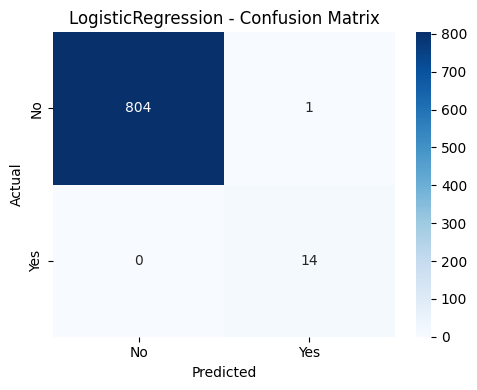

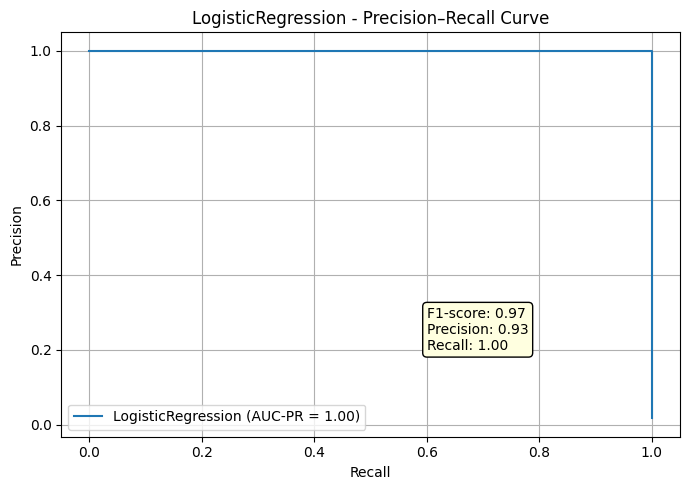


========================= RandomForest =========================
Precision:  0.933
Recall:     1.000
F1-score:   0.966
MCC:        0.965
AUC-PR:     1.000
Accuracy:     0.99878

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       805
         Yes       0.93      1.00      0.97        14

    accuracy                           1.00       819
   macro avg       0.97      1.00      0.98       819
weighted avg       1.00      1.00      1.00       819



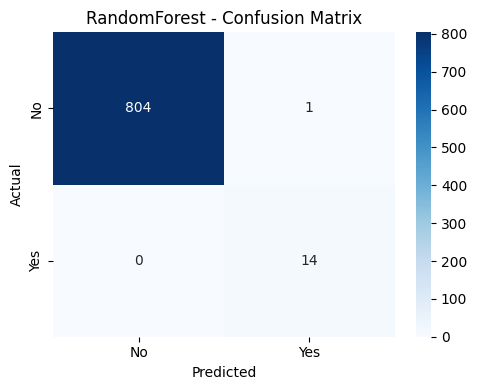

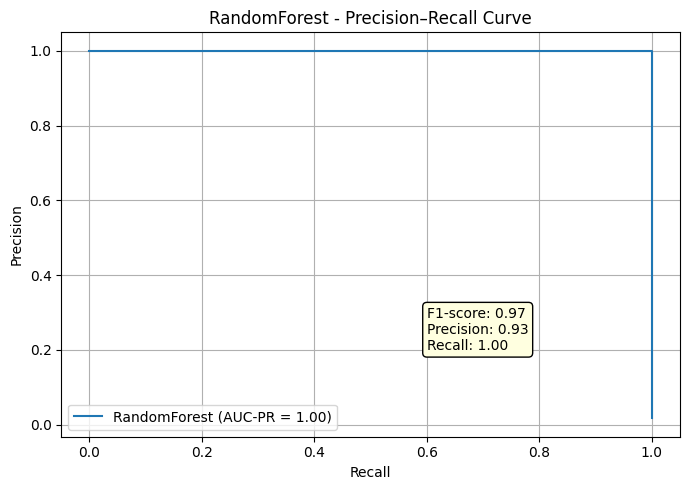


========================= Decision Trees =========================
Precision:  1.000
Recall:     1.000
F1-score:   1.000
MCC:        1.000
AUC-PR:     1.000
Accuracy:     1.00000

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       805
         Yes       1.00      1.00      1.00        14

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819



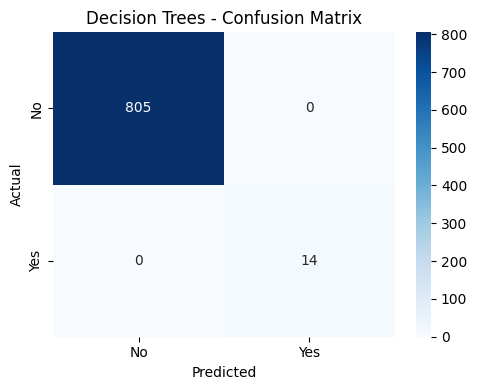

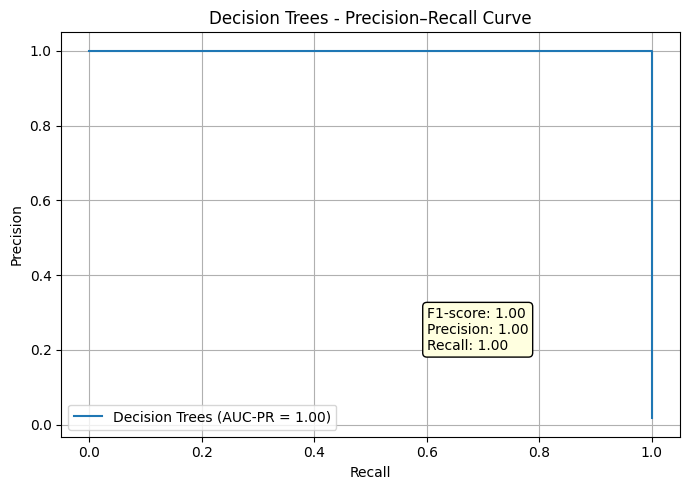

In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    matthews_corrcoef,
    precision_recall_curve, average_precision_score,
    classification_report, confusion_matrix, accuracy_score
)

# ---- Step 1: Load stratified data ----
with open('70-30(imputed)/X_train_enc.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('70-30(imputed)/X_test_enc.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('70-30(imputed)/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('70-30(imputed)/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# ---- Step 2: Convert target to binary ----
y_train_bin = y_train.map({'No': 0, 'Yes': 1})
y_test_bin  = y_test.map( {'No': 0, 'Yes': 1})

# ---- Step 3: Check for NaNs ----
print("\nMissing values in X_train:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])

print("\nMissing values in X_test:")
print(X_test.isna().sum()[X_test.isna().sum() > 0])

# ---- Step 4: Define models with preprocessing pipeline ----
# Create a preprocessing step: impute + scale
preprocessing = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Use 'most_frequent' for categorical
    ('scaler', StandardScaler())
])

# Define models wrapped in pipelines
models = {
    'LogisticRegression': Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
    ]),
    'RandomForest': Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42))
    ]),
    'Decision Trees': Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', DecisionTreeClassifier(criterion="gini", random_state=None))
    ])
}

# ---- Step 5: Train, predict, evaluate, visualize ----
for name, pipeline in models.items():
    print(f"\n{'='*25} {name} {'='*25}")
    pipeline.fit(X_train, y_train_bin)

    y_proba = pipeline.predict_proba(X_test)[:, 1]
    y_pred  = pipeline.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test_bin, y_pred)
    prec = precision_score(y_test_bin, y_pred)
    rec  = recall_score(y_test_bin, y_pred)
    f1   = f1_score(y_test_bin, y_pred)
    mcc  = matthews_corrcoef(y_test_bin, y_pred)
    ap   = average_precision_score(y_test_bin, y_proba)

    print(f"Precision:  {prec:.3f}")
    print(f"Recall:     {rec:.3f}")
    print(f"F1-score:   {f1:.3f}")
    print(f"MCC:        {mcc:.3f}")
    print(f"AUC-PR:     {ap:.3f}")
    print(f"Accuracy:    {acc: .5f}")
    print("\nClassification Report:\n", classification_report(y_test_bin, y_pred, target_names=['No','Yes']))

    # ---- Confusion Matrix ----
    cm = confusion_matrix(y_test_bin, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # ---- Precision-Recall Curve ----
    precision_vals, recall_vals, _ = precision_recall_curve(y_test_bin, y_proba)
    plt.figure(figsize=(7, 5))
    plt.plot(recall_vals, precision_vals, label=f'{name} (AUC-PR = {ap:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} - Precision–Recall Curve')
    plt.grid()
    plt.legend(loc='lower left')

    # Annotate metrics on plot
    plt.text(0.6, 0.2, f'F1-score: {f1:.2f}\nPrecision: {prec:.2f}\nRecall: {rec:.2f}',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='black'))
    plt.tight_layout()
    plt.show()

SVC

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    matthews_corrcoef, average_precision_score,
    precision_recall_curve, classification_report,
    confusion_matrix, accuracy_score
)

# ---- Step 1: Load Data ----
with open('70-30(imputed)/X_train_enc.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('70-30(imputed)/X_test_enc.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('70-30(imputed)/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('70-30(imputed)/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# ---- Step 2: Impute Missing Values ----
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# ---- Step 3: Scale Features ----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Step 4: Convert Target to Binary ----
y_train_bin = y_train.map({'No': 0, 'Yes': 1})
y_test_bin  = y_test.map( {'No': 0, 'Yes': 1})

# ---- Step 5: Define Parameter Grid ----
param_grid = {
    'C': [0.1, 1],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']
}

svc = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(
    svc,
    param_grid,
    scoring='average_precision',  # Better for imbalanced data
    cv=5,
    n_jobs=-1,
    verbose=2
)

# ---- Step 6: Fit Model ----
grid_search.fit(X_train, y_train_bin)
best_model = grid_search.best_estimator_

print("\nBest Parameters from GridSearch:")
print(grid_search.best_params_)

# ---- Step 7: Evaluate on Test Data ----
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred  = best_model.predict(X_test)

prec = precision_score(y_test_bin, y_pred, zero_division=0)
rec  = recall_score(y_test_bin, y_pred, zero_division=0)
f1   = f1_score(y_test_bin, y_pred, zero_division=0)
mcc  = matthews_corrcoef(y_test_bin, y_pred)
ap   = average_precision_score(y_test_bin, y_proba)

print("\n===== SVC with Grid Search Evaluation =====")
print(f"Precision:  {prec:.3f}")
print(f"Recall:     {rec:.3f}")
print(f"F1-score:   {f1:.3f}")
print(f"MCC:        {mcc:.3f}")
print(f"AUC-PR:     {ap:.3f}")
print("\nClassification Report:\n", classification_report(y_test_bin, y_pred, target_names=['No', 'Yes'], zero_division=0))

# ---- Step 8: Confusion Matrix ----
cm = confusion_matrix(y_test_bin, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('SVC (GridSearch) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ---- Step 9: Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test_bin, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'SVC (AUC-PR = {ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVC - Precision–Recall Curve')
plt.grid()
plt.legend(loc='lower left')

plt.text(0.6, 0.2, f'F1-score: {f1:.2f}\nPrecision: {prec:.2f}\nRecall: {rec:.2f}',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='black'))
plt.tight_layout()
plt.show()